In [ ]:
# Install specific compatible versions
!pip install ppscore
!pip install pandas==1.3.3
!pip install xgboost


Mounted at /content/drive
--- Random Forest ---
Recurred - Random Forest Accuracy: 0.9740
Recurred - Random Forest Precision: 1.0000
Recurred - Random Forest Recall: 0.8947
Recurred - Random Forest F1-score: 0.9444
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

Stage - Random Forest Accuracy: 0.9610
Stage - Random Forest Precision: 0.8298
Stage - Random Forest Recall: 0.7500
Stage - Random Forest F1-score: 0.7649
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       0.33      0.50      0.40         2
           2       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         4

    accuracy                   

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:07:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:07:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Recurred - XGBoost Accuracy: 0.9740
Recurred - XGBoost Precision: 0.9474
Recurred - XGBoost Recall: 0.9474
Recurred - XGBoost F1-score: 0.9474
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

Stage - XGBoost Accuracy: 0.9870
Stage - XGBoost Precision: 0.9167
Stage - XGBoost Recall: 0.9375
Stage - XGBoost F1-score: 0.9143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           4       1.00      0.75      0.86         4

    accuracy                           0.99        77
   macro avg       0.92      0.94      0.91        77
weighted avg       

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

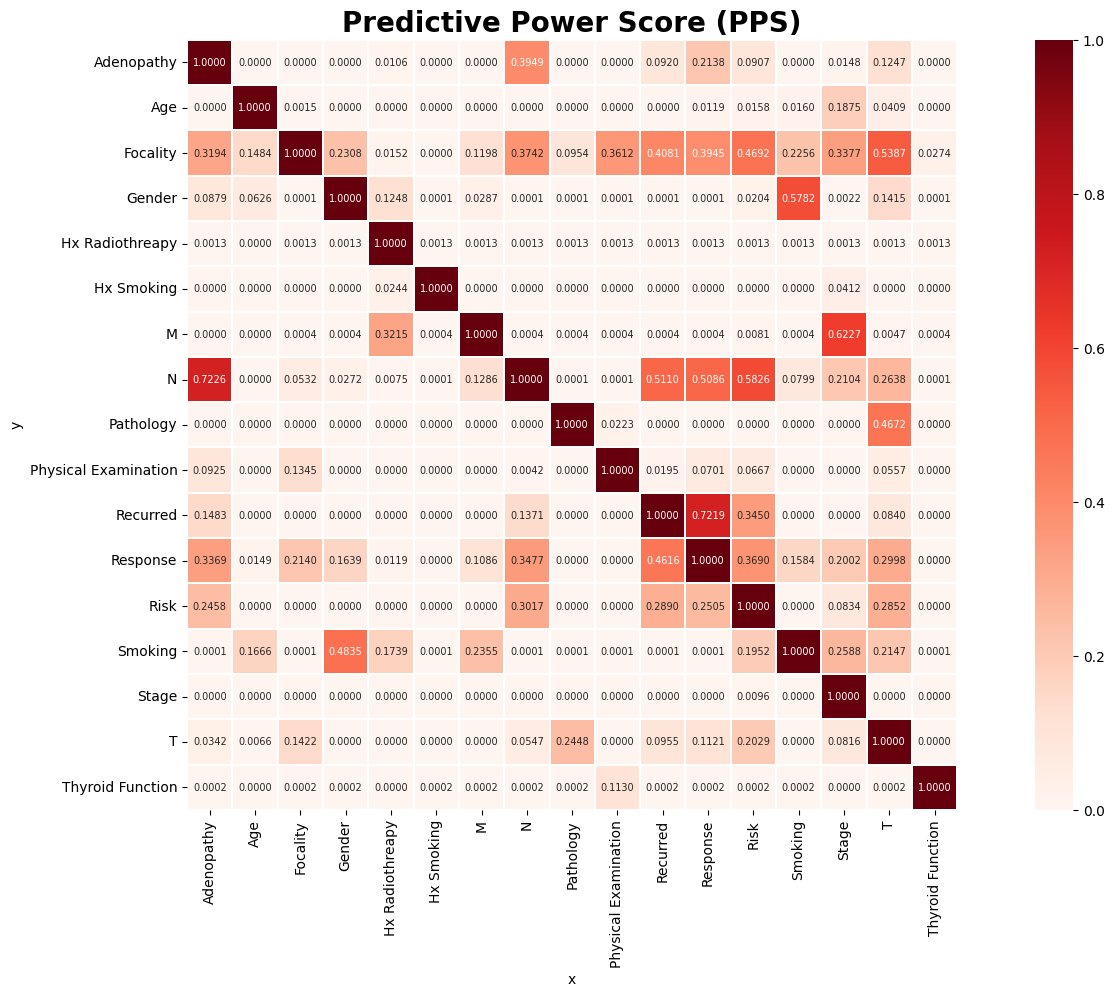

In [ ]:
# Install necessary libraries
!pip install ppscore pandas==1.3.3 xgboost

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Thyroid_Diff.csv')

# Label encode the target variables
label_encoder = LabelEncoder()
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])
df['Stage'] = label_encoder.fit_transform(df['Stage'])
df['Risk'] = label_encoder.fit_transform(df['Risk'])

# Separate features and target variables
X = df.drop(['Recurred', 'Stage', 'Risk'], axis=1)
y = df[['Recurred', 'Stage', 'Risk']]

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True).astype(int)

# Split the data for multiple objectives
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models with parameters
models = {
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(n_estimators=100)),
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy')),
    'SVM': MultiOutputClassifier(SVC(C=1, kernel='rbf', probability=True)),
    'Logistic Regression': MultiOutputClassifier(LogisticRegression(C=1, solver='liblinear', max_iter=200)),
    'KNN': MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance')),
    'Naive Bayes': MultiOutputClassifier(GaussianNB()),
    'XGBoost': MultiOutputClassifier(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss'))
}

# Train models and evaluate on multiple objectives
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Separate predictions
    y_pred_recurred, y_pred_stage, y_pred_risk = y_pred.T
    y_recurred_test, y_stage_test, y_risk_test = y_test.T.values

    # Recurred metrics
    print(f"Recurred - {name} Accuracy: {accuracy_score(y_recurred_test, y_pred_recurred):.4f}")
    print(f"Recurred - {name} Precision: {precision_score(y_recurred_test, y_pred_recurred, zero_division=1):.4f}")
    print(f"Recurred - {name} Recall: {recall_score(y_recurred_test, y_pred_recurred, zero_division=1):.4f}")
    print(f"Recurred - {name} F1-score: {f1_score(y_recurred_test, y_pred_recurred, zero_division=1):.4f}")
    print(classification_report(y_recurred_test, y_pred_recurred, zero_division=1))

    # Stage metrics
    print(f"Stage - {name} Accuracy: {accuracy_score(y_stage_test, y_pred_stage):.4f}")
    print(f"Stage - {name} Precision: {precision_score(y_stage_test, y_pred_stage, average='macro', zero_division=1):.4f}")
    print(f"Stage - {name} Recall: {recall_score(y_stage_test, y_pred_stage, average='macro', zero_division=1):.4f}")
    print(f"Stage - {name} F1-score: {f1_score(y_stage_test, y_pred_stage, average='macro', zero_division=1):.4f}")
    print(classification_report(y_stage_test, y_pred_stage, zero_division=1))

    # Risk metrics
    print(f"Risk - {name} Accuracy: {accuracy_score(y_risk_test, y_pred_risk):.4f}")
    print(f"Risk - {name} Precision: {precision_score(y_risk_test, y_pred_risk, average='macro', zero_division=1):.4f}")
    print(f"Risk - {name} Recall: {recall_score(y_risk_test, y_pred_risk, average='macro', zero_division=1):.4f}")
    print(f"Risk - {name} F1-score: {f1_score(y_risk_test, y_pred_risk, average='macro', zero_division=1):.4f}")
    print(classification_report(y_risk_test, y_pred_risk, zero_division=1))

# Generate and visualize PPS matrix
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot_table(values='ppscore', index='y', columns='x')
plt.figure(figsize=(20, 10))
sns.heatmap(pps_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 7}, fmt='.4f', square=True, linewidths=1.1)
plt.title("Predictive Power Score (PPS)", fontsize=20, fontweight='bold', color='black')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay  # Corrected import
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive
--- Random Forest ---
Recurred - Random Forest Accuracy: 0.9870
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


Confusion Matrix for Random Forest - Recurred


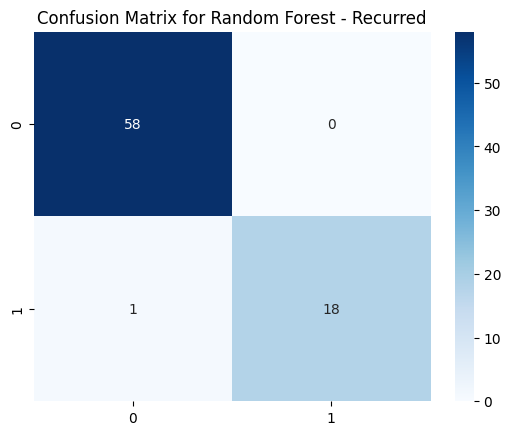


ROC and Precision-Recall Curves for Random Forest


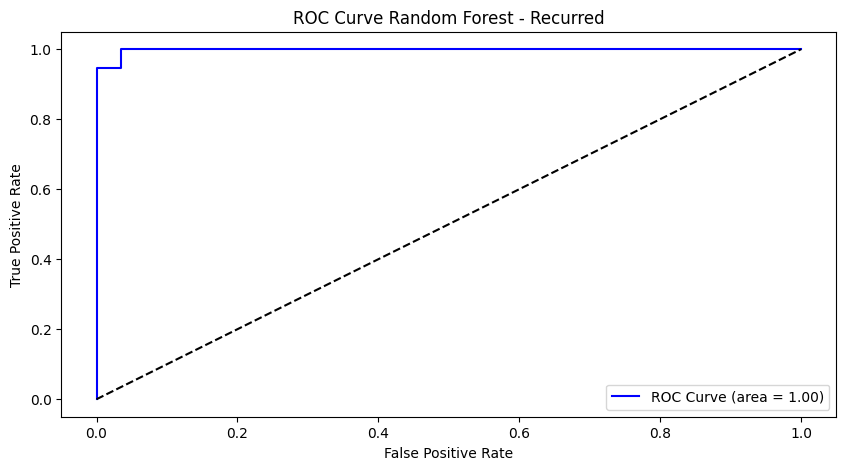

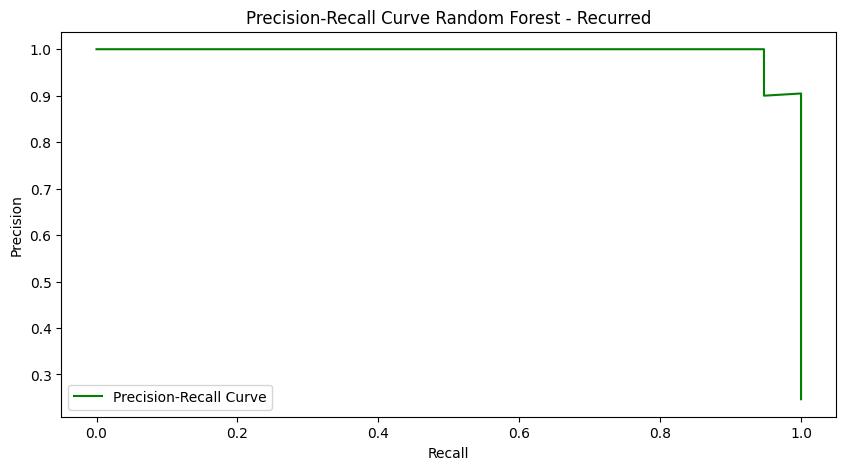

--- Decision Tree ---
Recurred - Decision Tree Accuracy: 0.9610
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77


Confusion Matrix for Decision Tree - Recurred


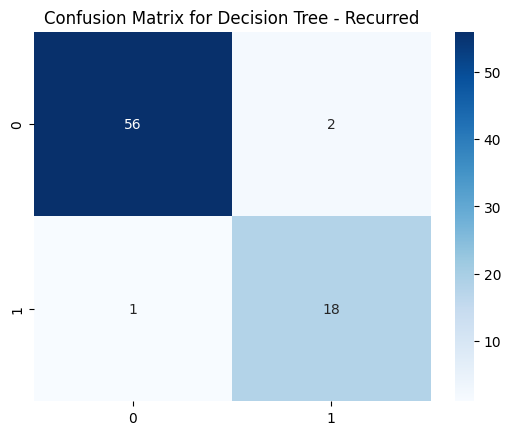


ROC and Precision-Recall Curves for Decision Tree


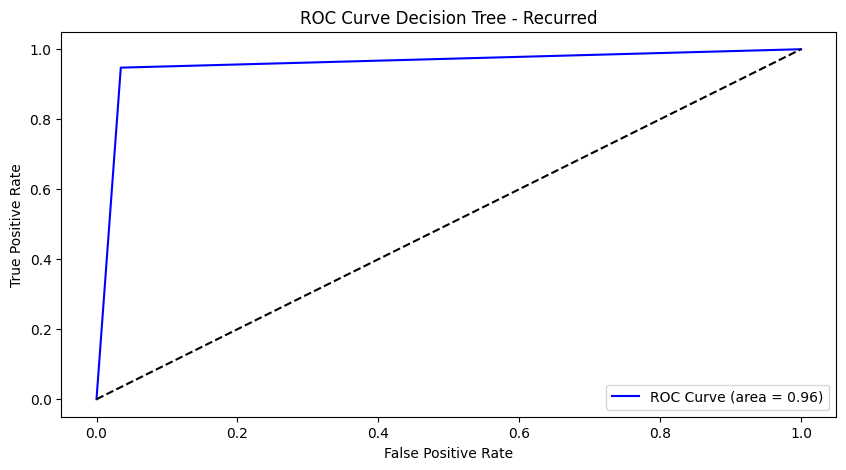

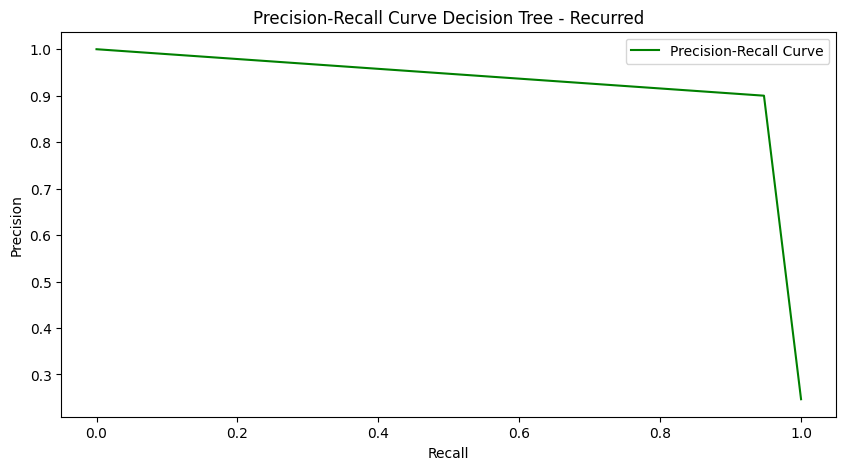

--- SVM ---
Recurred - SVM Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77


Confusion Matrix for SVM - Recurred


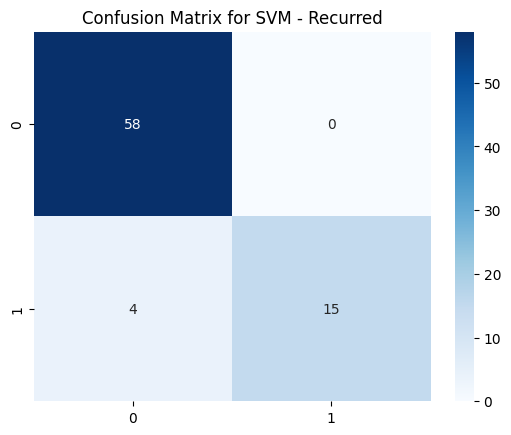


ROC and Precision-Recall Curves for SVM


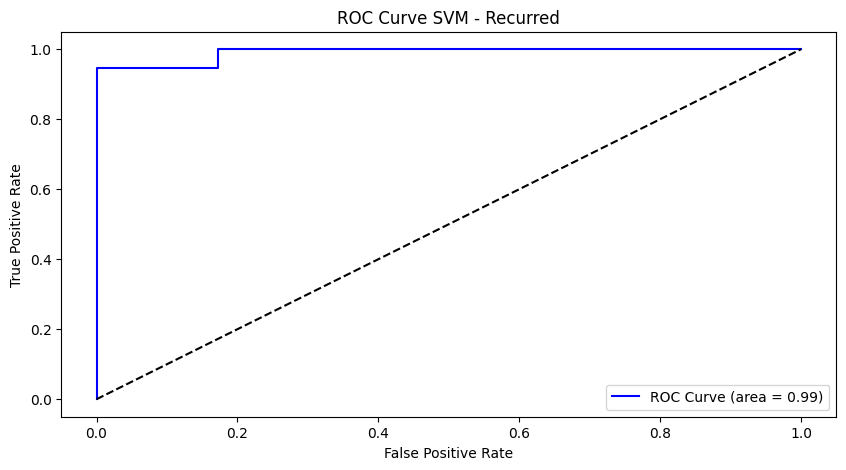

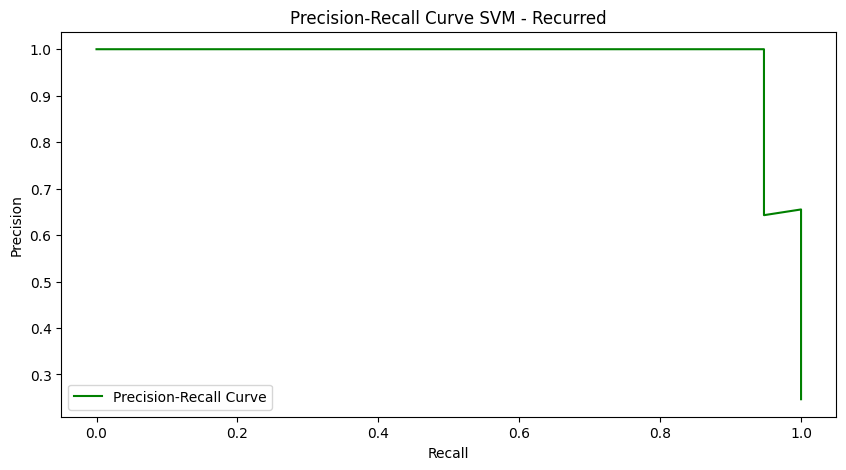

--- Logistic Regression ---
Recurred - Logistic Regression Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77


Confusion Matrix for Logistic Regression - Recurred


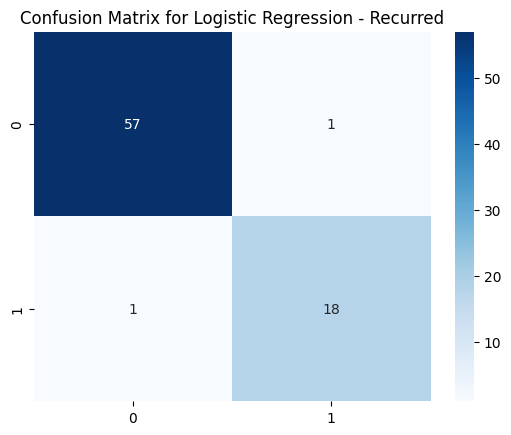


ROC and Precision-Recall Curves for Logistic Regression


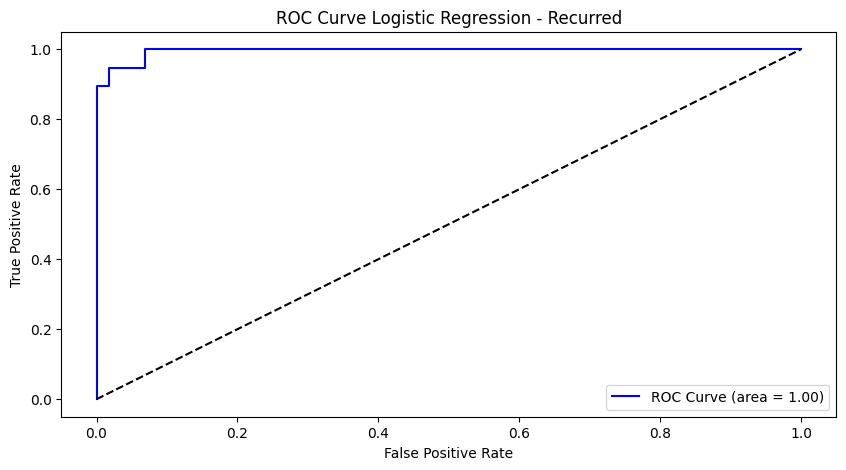

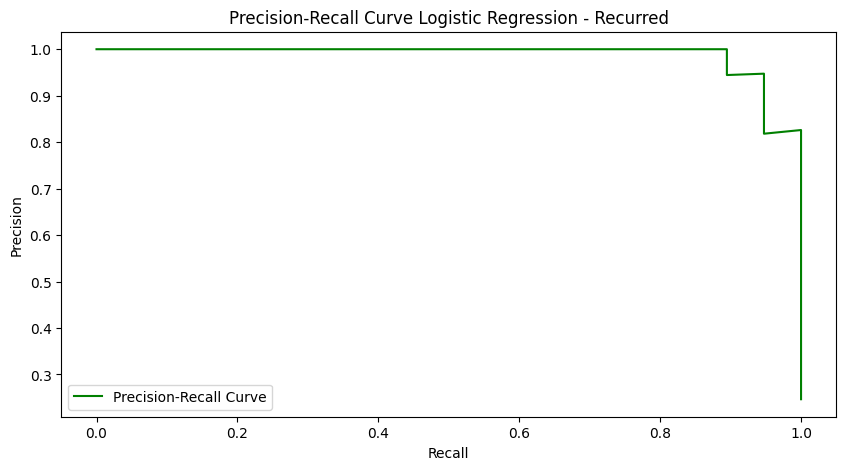

--- KNN ---
Recurred - KNN Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77


Confusion Matrix for KNN - Recurred


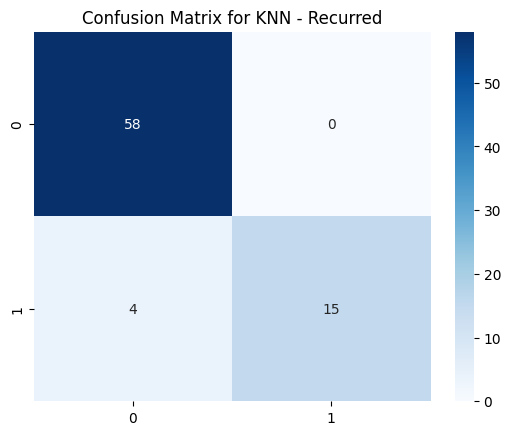


ROC and Precision-Recall Curves for KNN


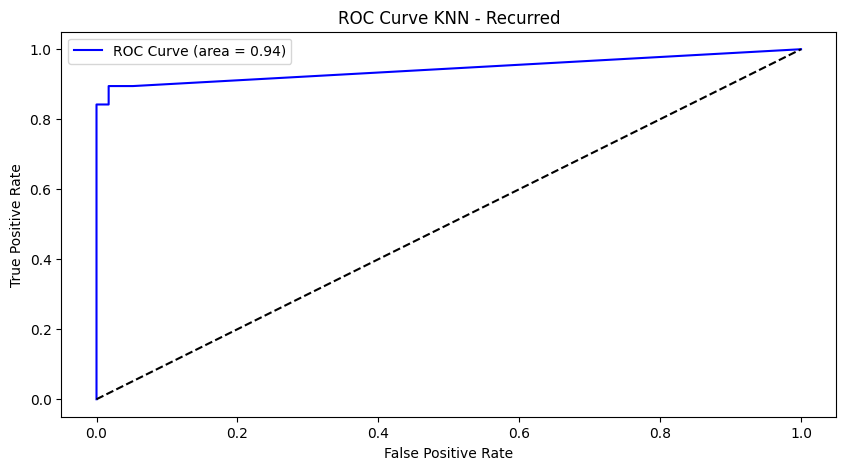

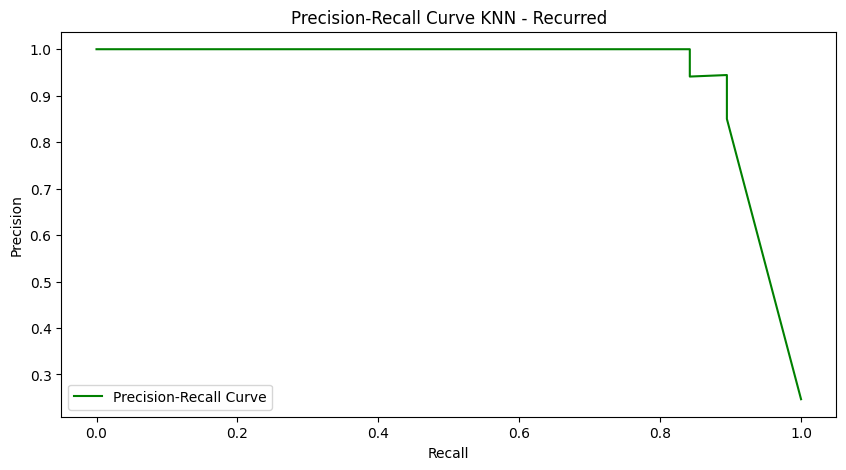

--- Naive Bayes ---
Recurred - Naive Bayes Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.94      0.84      0.89        19

    accuracy                           0.95        77
   macro avg       0.95      0.91      0.93        77
weighted avg       0.95      0.95      0.95        77


Confusion Matrix for Naive Bayes - Recurred


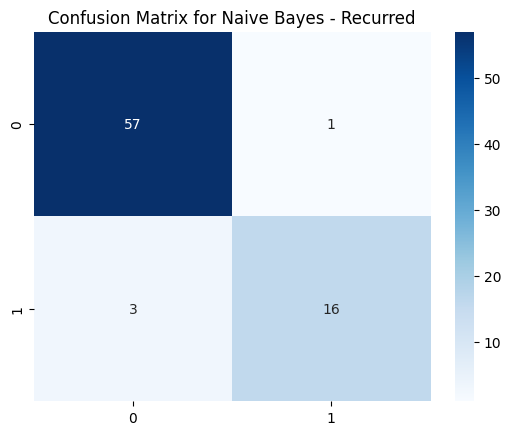


ROC and Precision-Recall Curves for Naive Bayes


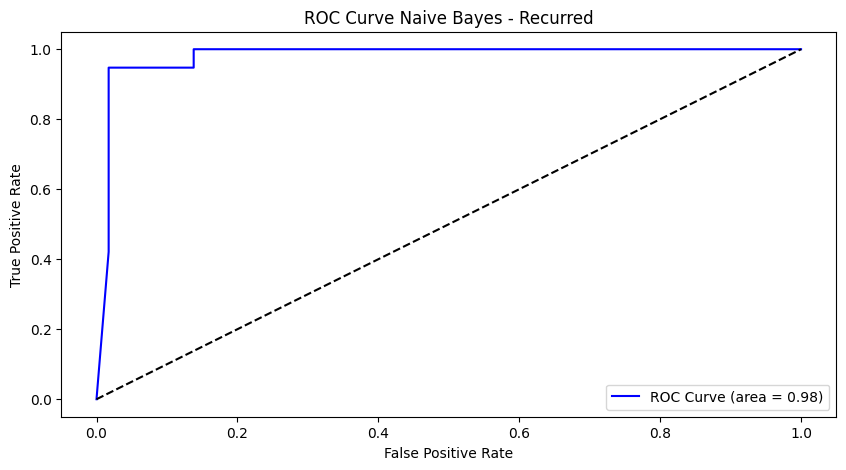

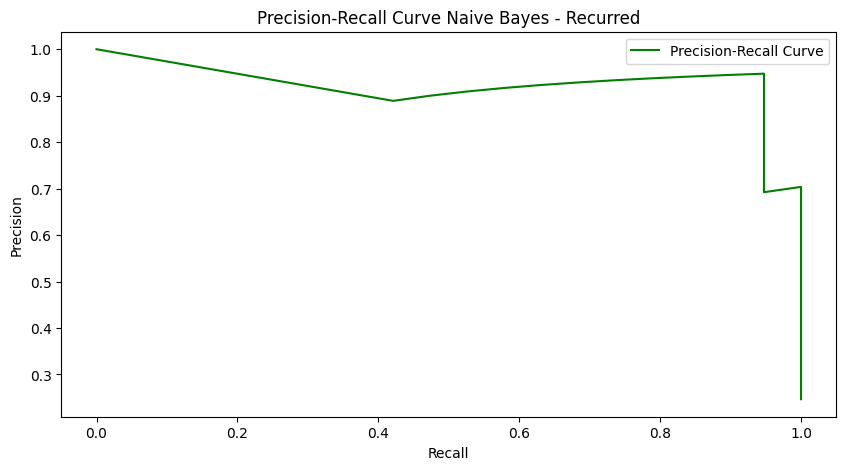

--- XGBoost ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:08:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Recurred - XGBoost Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77


Confusion Matrix for XGBoost - Recurred


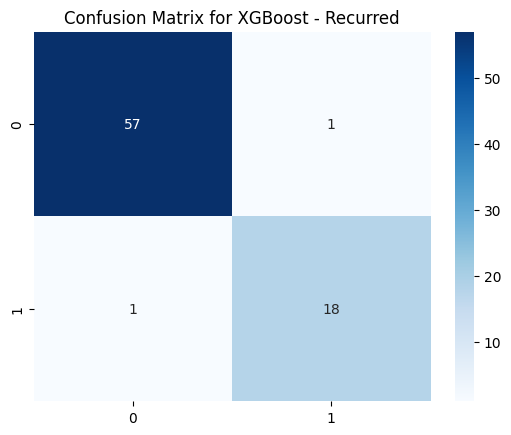


ROC and Precision-Recall Curves for XGBoost


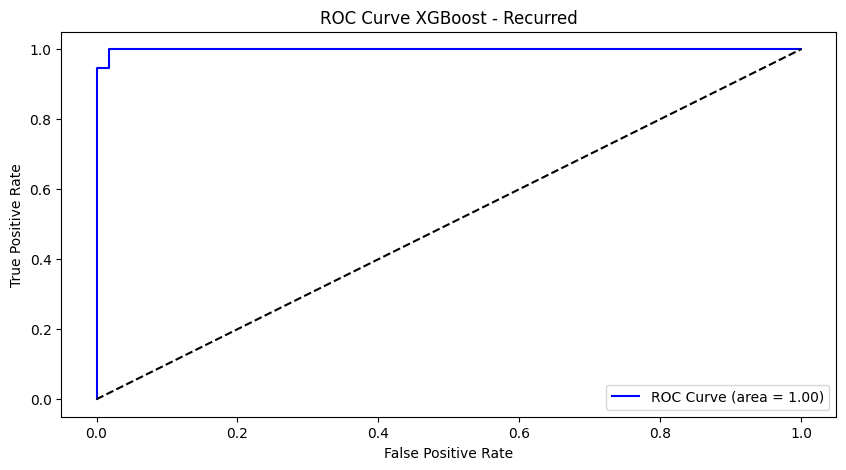

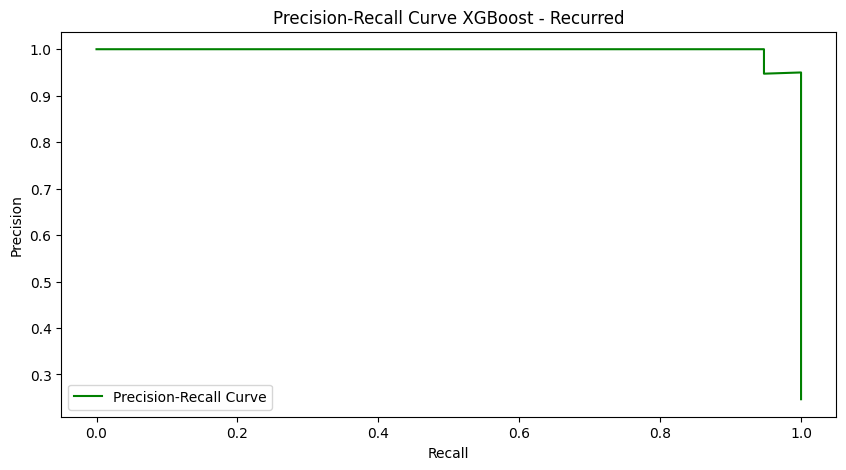

--- Random Forest ---

Recurred - Random Forest
Accuracy: 0.9870
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



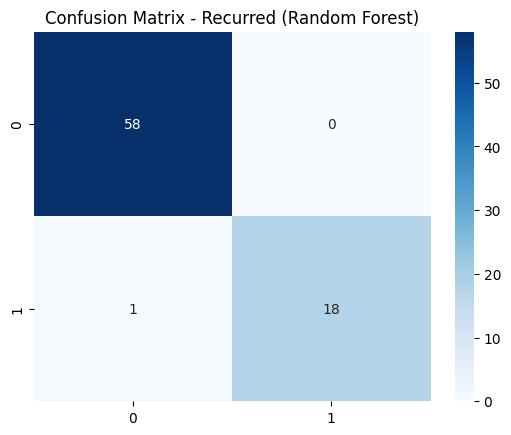

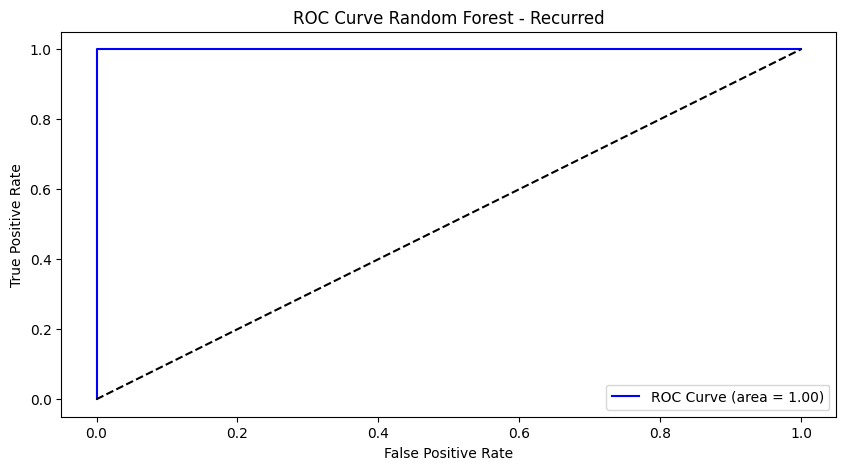

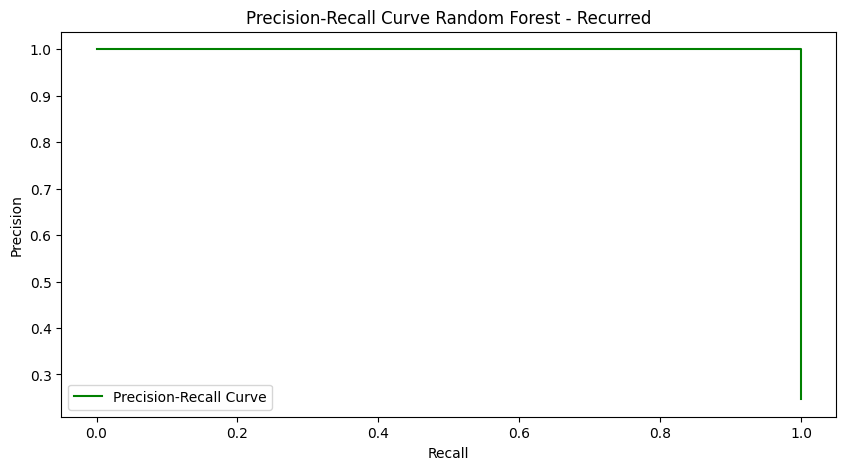


Stage - Random Forest
Accuracy: 0.9610
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       0.33      0.50      0.40         2
           2       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.96        77
   macro avg       0.83      0.75      0.76        77
weighted avg       0.97      0.96      0.96        77



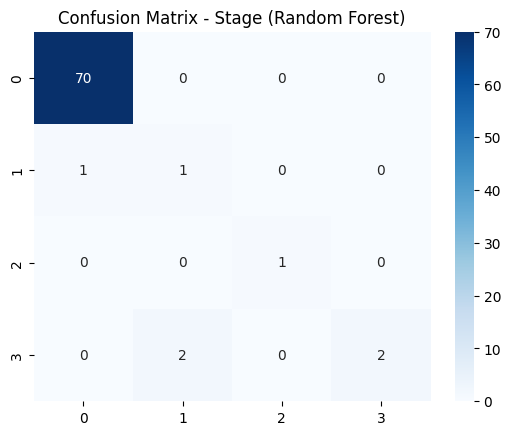

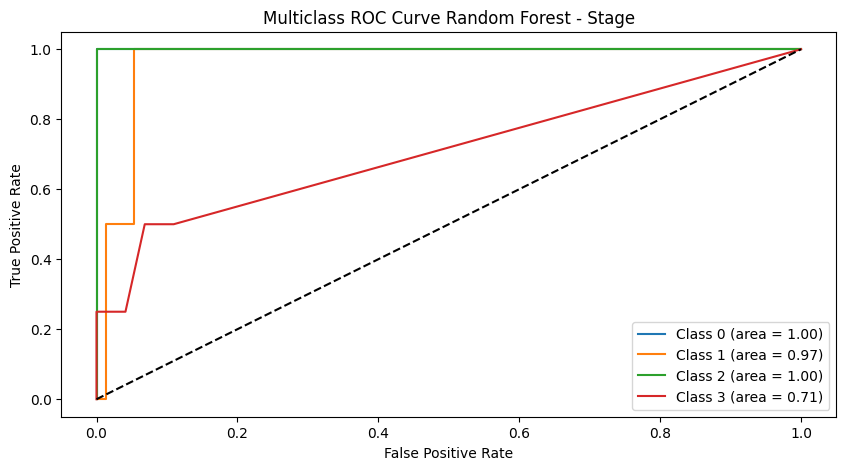

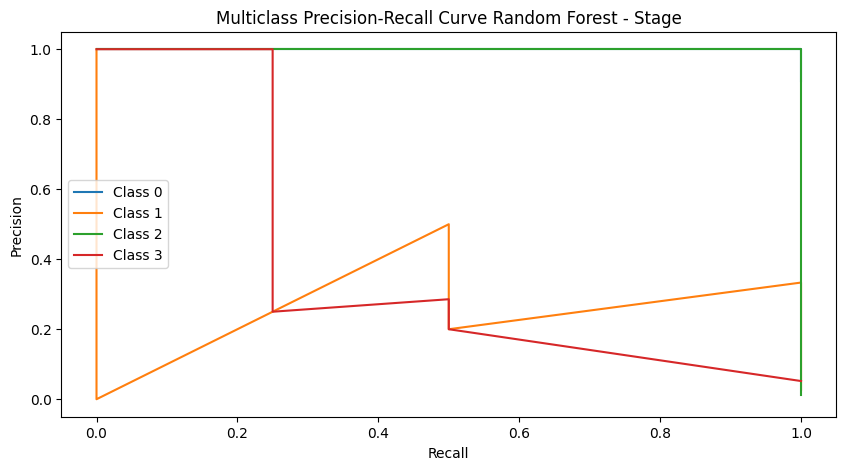


Risk - Random Forest
Accuracy: 0.8831
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.82      0.56      0.67        16
           2       0.89      0.98      0.93        55

    accuracy                           0.88        77
   macro avg       0.90      0.79      0.84        77
weighted avg       0.88      0.88      0.87        77



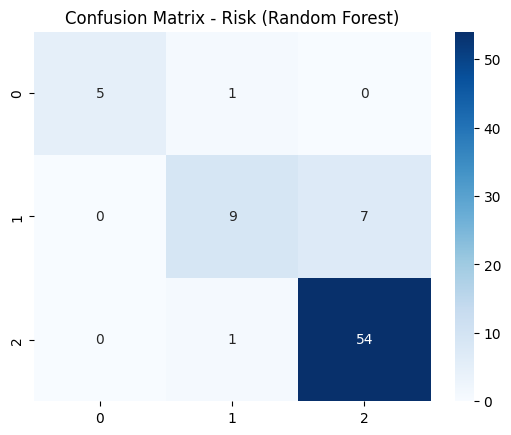

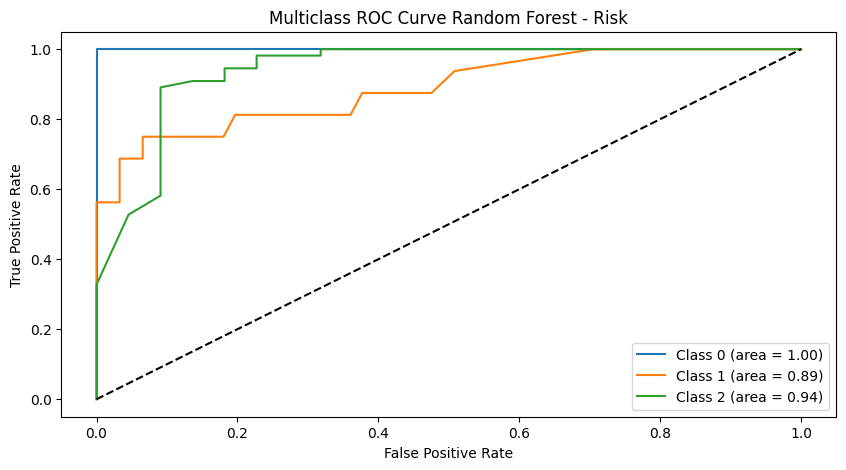

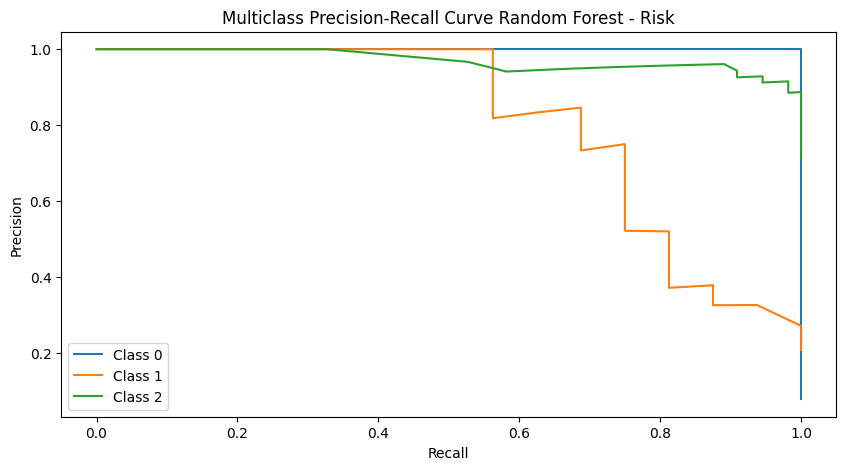

--- Decision Tree ---

Recurred - Decision Tree
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



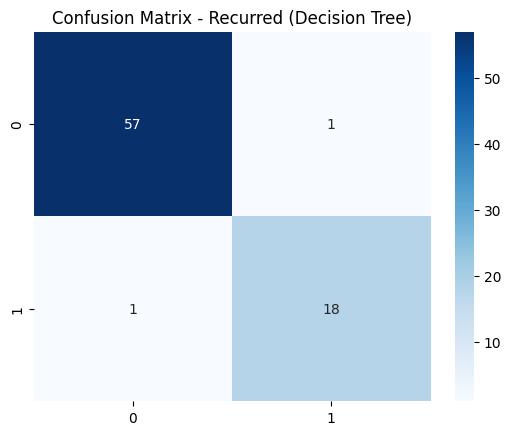

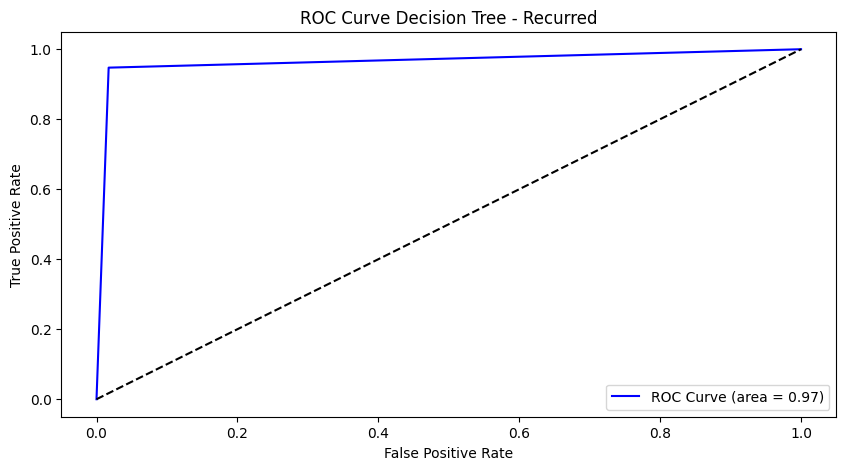

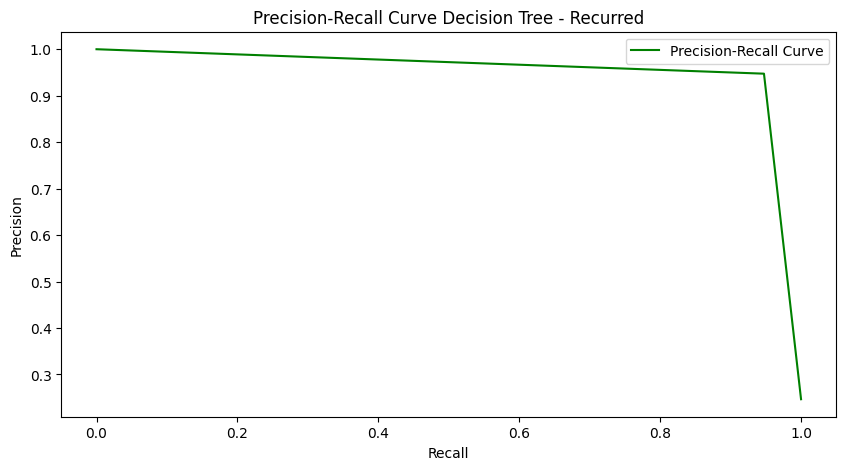


Stage - Decision Tree
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



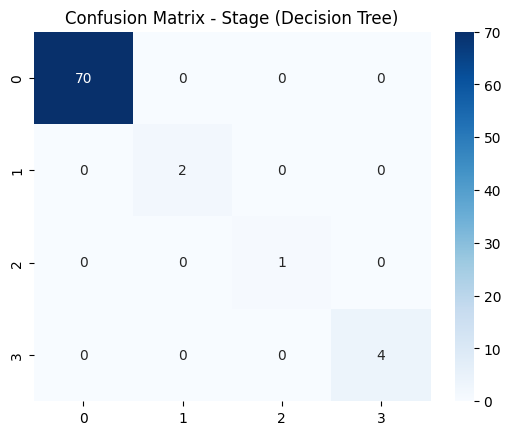

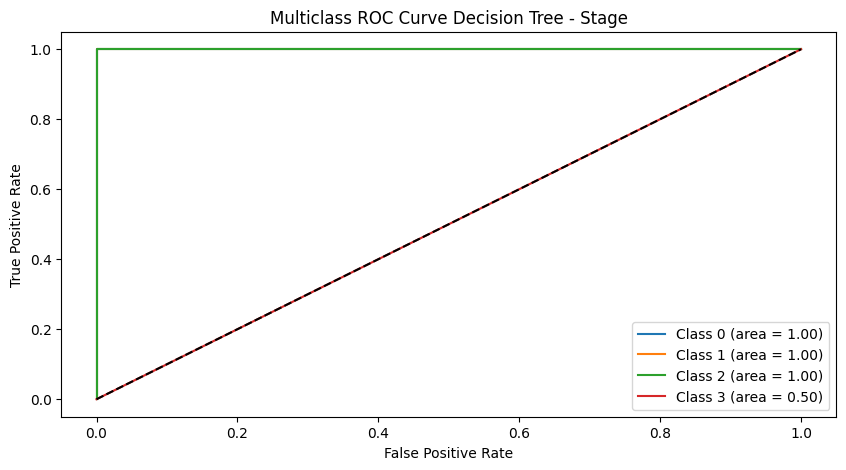

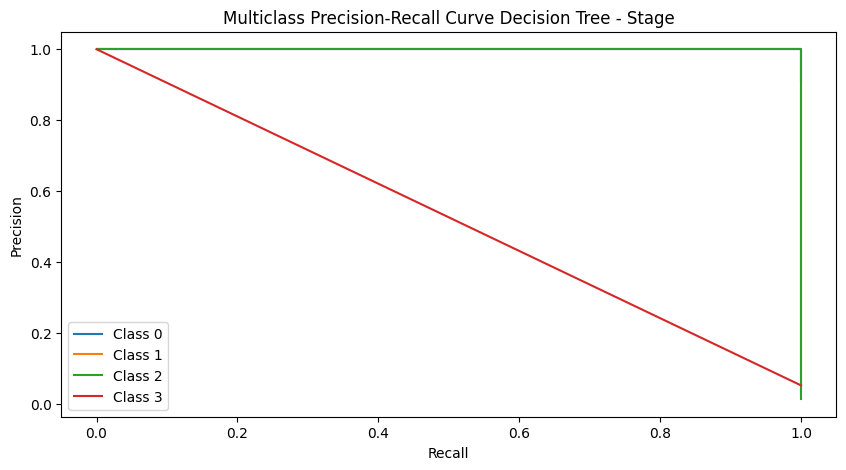


Risk - Decision Tree
Accuracy: 0.8701
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      0.50      0.62        16
           2       0.87      0.96      0.91        55

    accuracy                           0.87        77
   macro avg       0.89      0.82      0.84        77
weighted avg       0.86      0.87      0.86        77



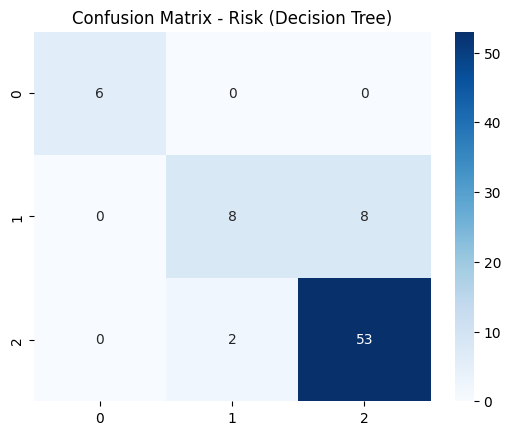

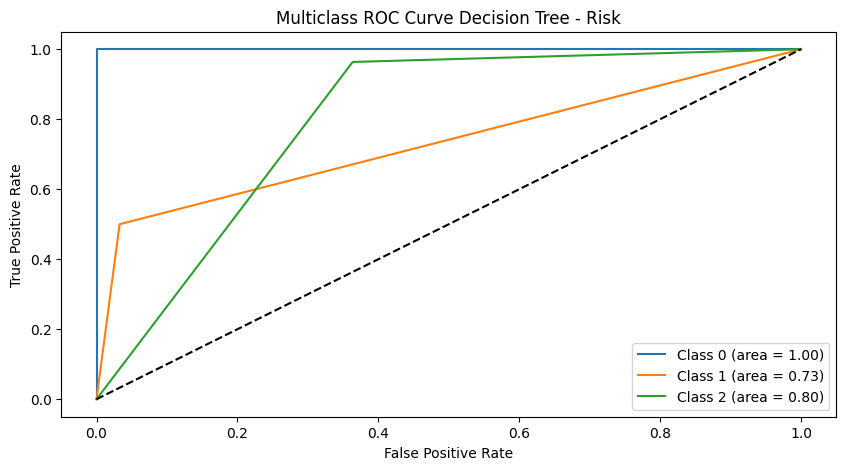

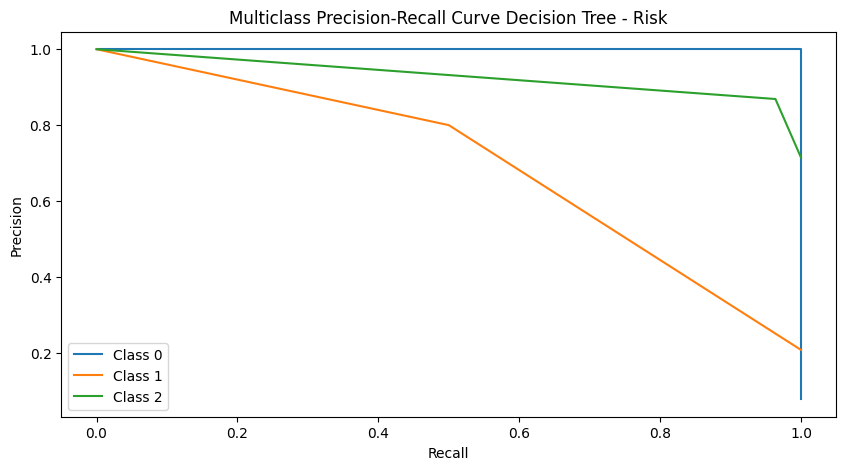

--- SVM ---

Recurred - SVM
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77



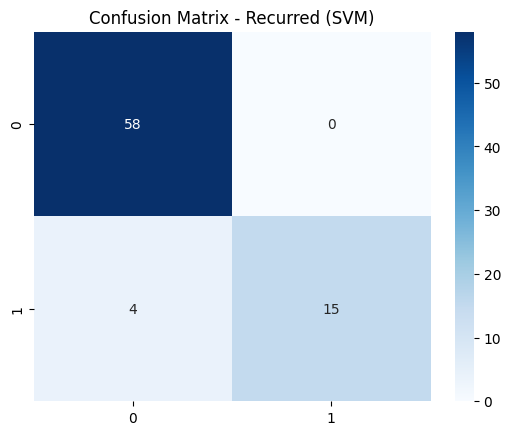

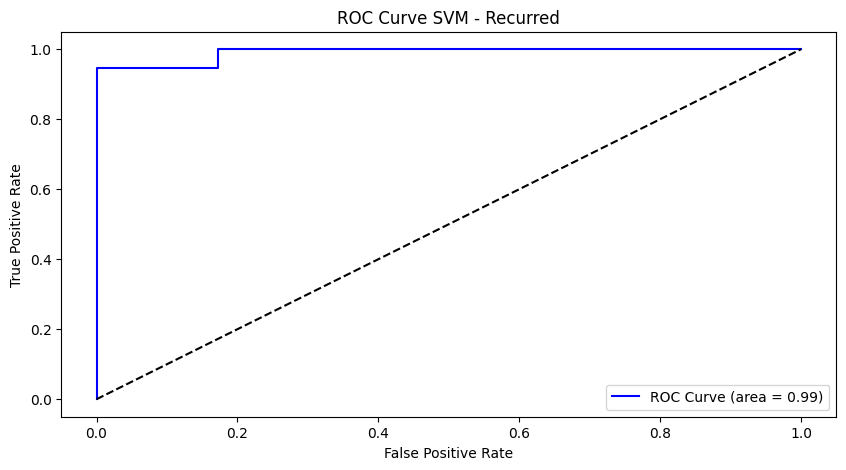

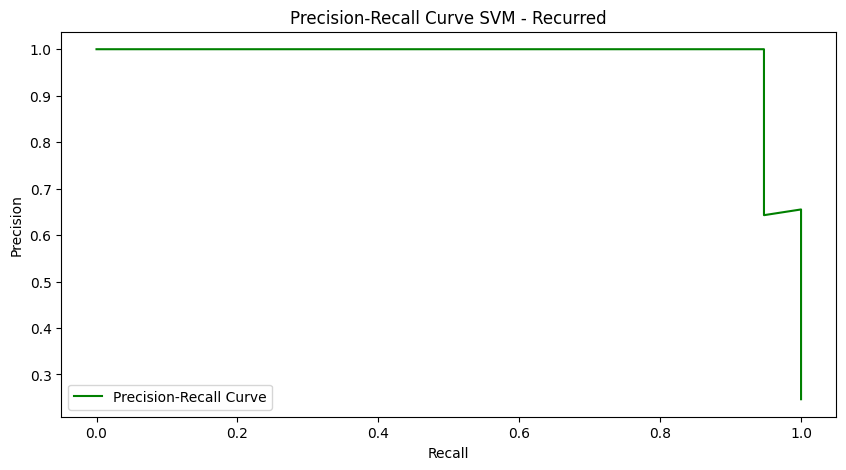


Stage - SVM
Accuracy: 0.9221
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        70
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       1.00      0.25      0.40         4

    accuracy                           0.92        77
   macro avg       0.48      0.31      0.34        77
weighted avg       0.89      0.92      0.89        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


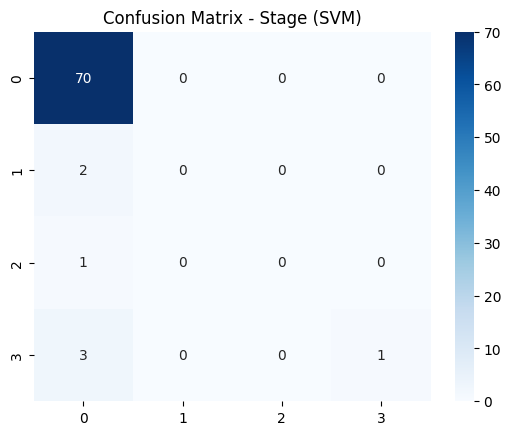

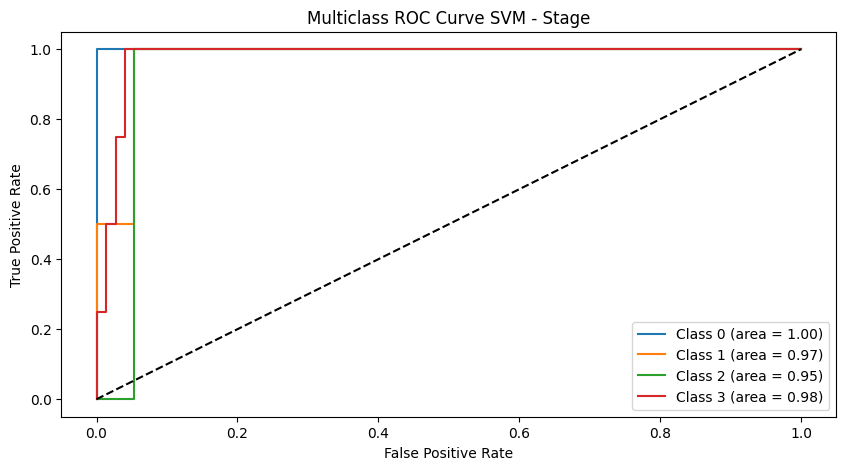

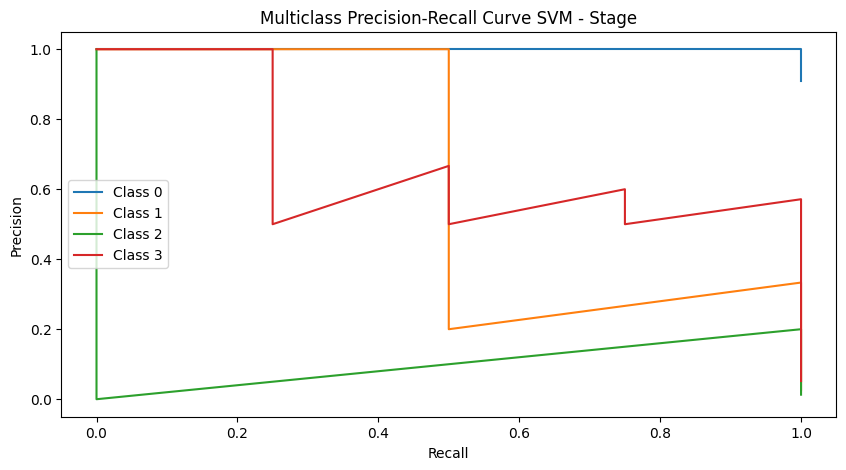


Risk - SVM
Accuracy: 0.9091
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.91      0.62      0.74        16
           2       0.92      1.00      0.96        55

    accuracy                           0.91        77
   macro avg       0.89      0.82      0.84        77
weighted avg       0.91      0.91      0.90        77



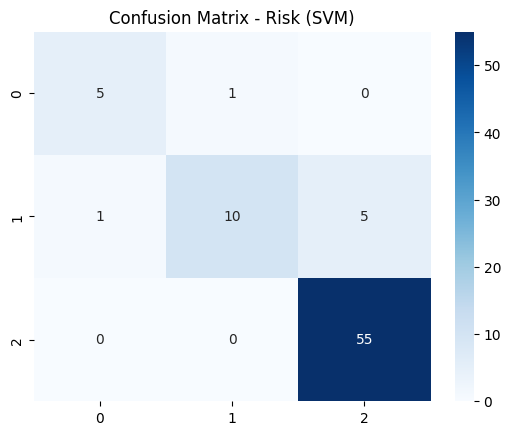

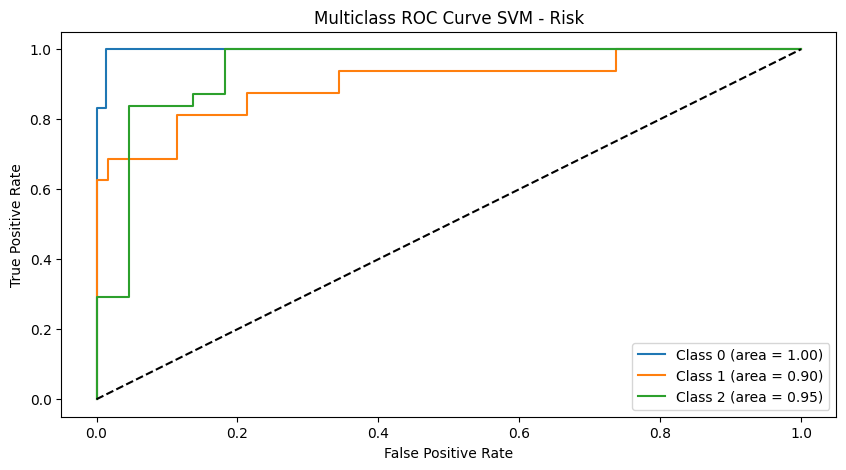

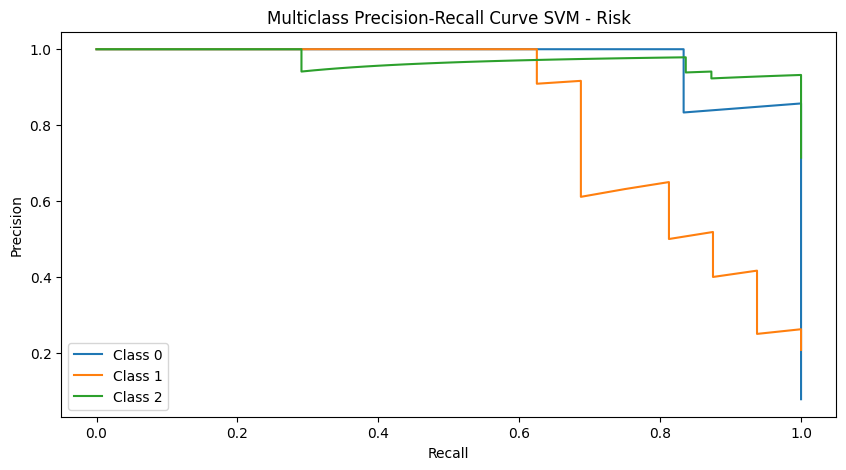

--- Logistic Regression ---

Recurred - Logistic Regression
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



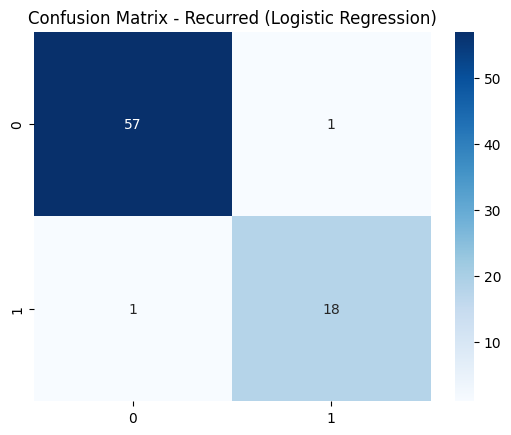

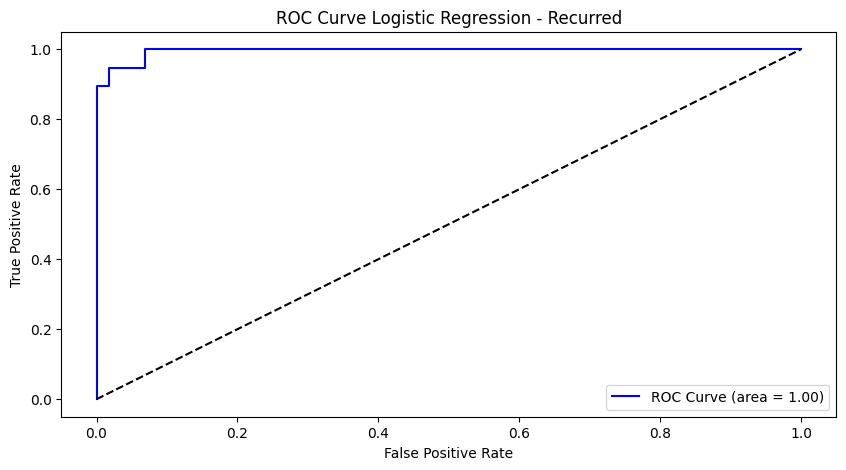

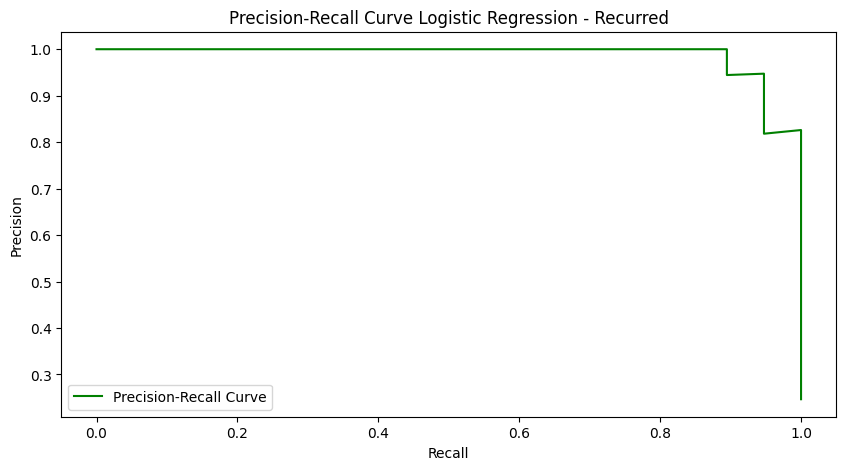


Stage - Logistic Regression
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.25      0.50      0.33         2
           2       1.00      1.00      1.00         1
           4       0.50      0.25      0.33         4

    accuracy                           0.95        77
   macro avg       0.69      0.69      0.67        77
weighted avg       0.95      0.95      0.95        77



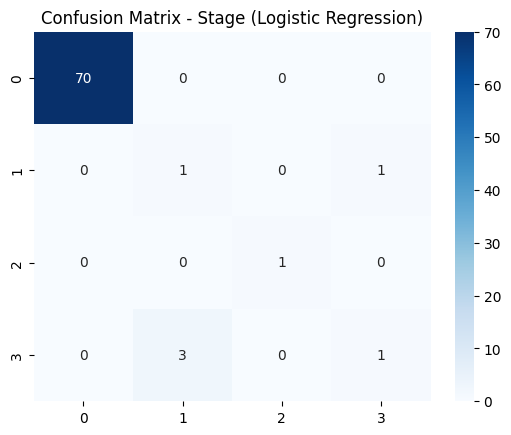

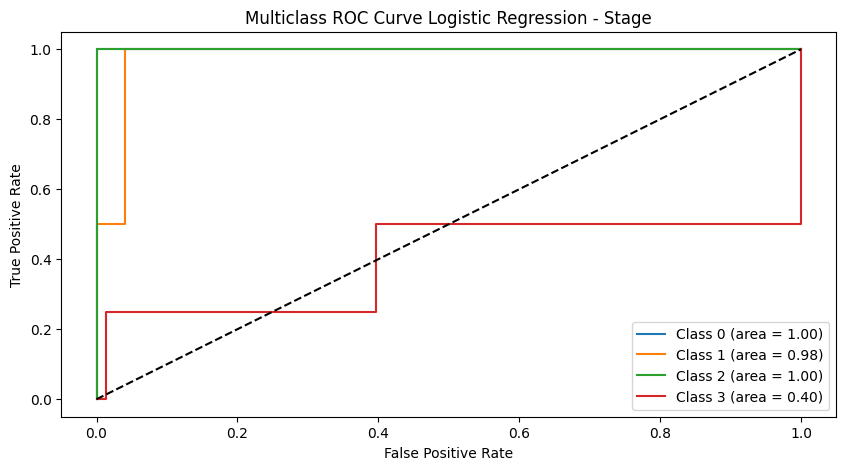

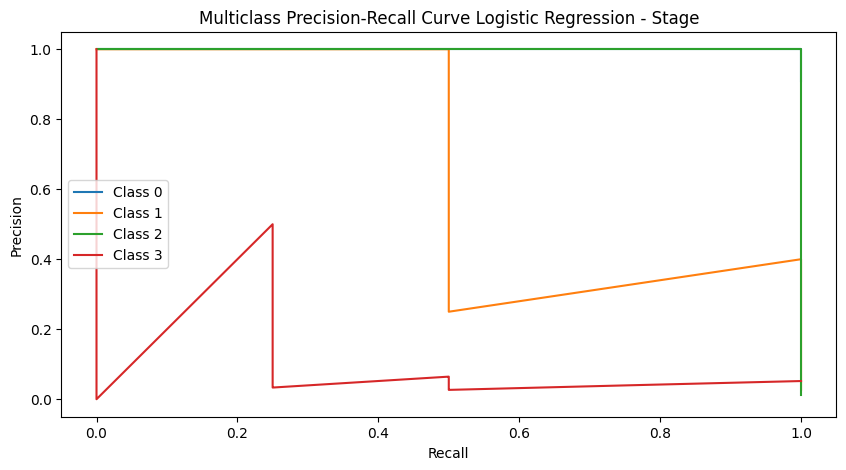


Risk - Logistic Regression
Accuracy: 0.9091
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.80      0.75      0.77        16
           2       0.95      0.98      0.96        55

    accuracy                           0.91        77
   macro avg       0.85      0.80      0.82        77
weighted avg       0.91      0.91      0.91        77



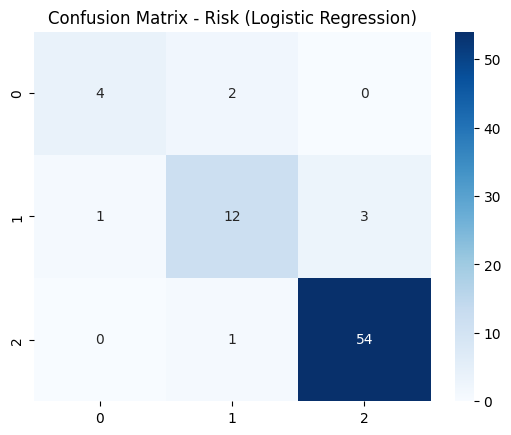

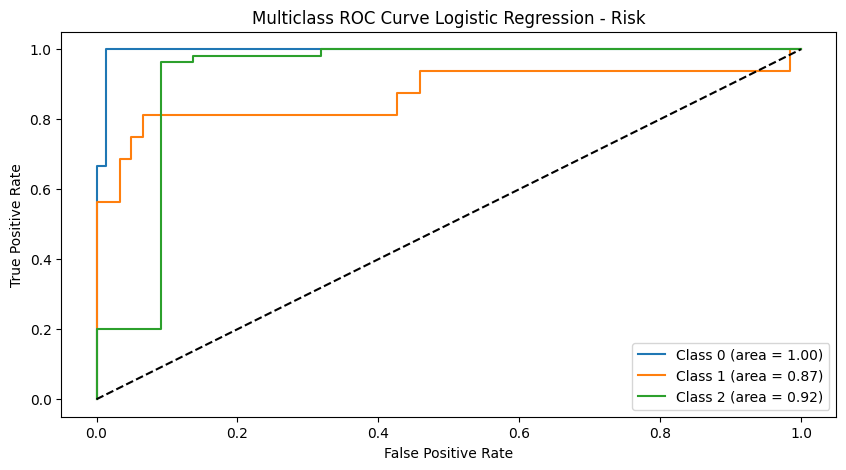

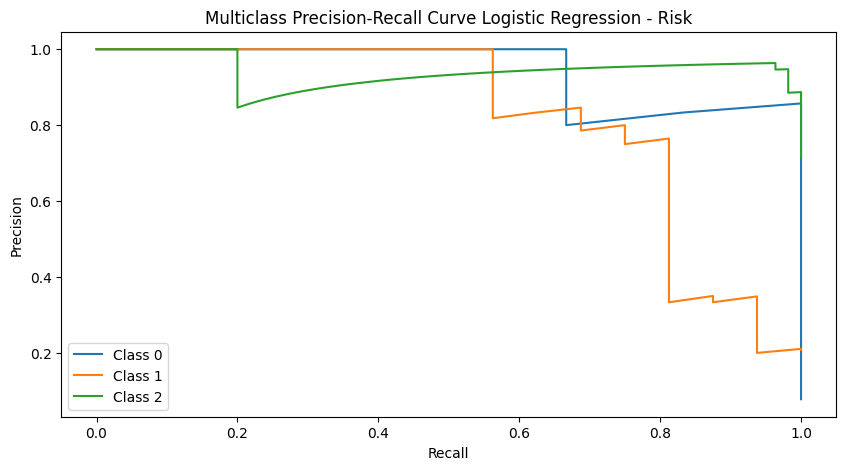

--- KNN ---

Recurred - KNN
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77



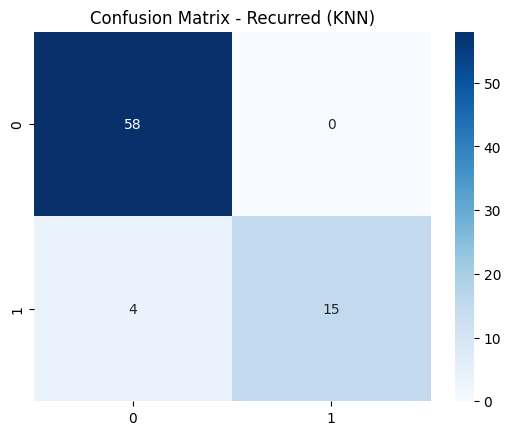

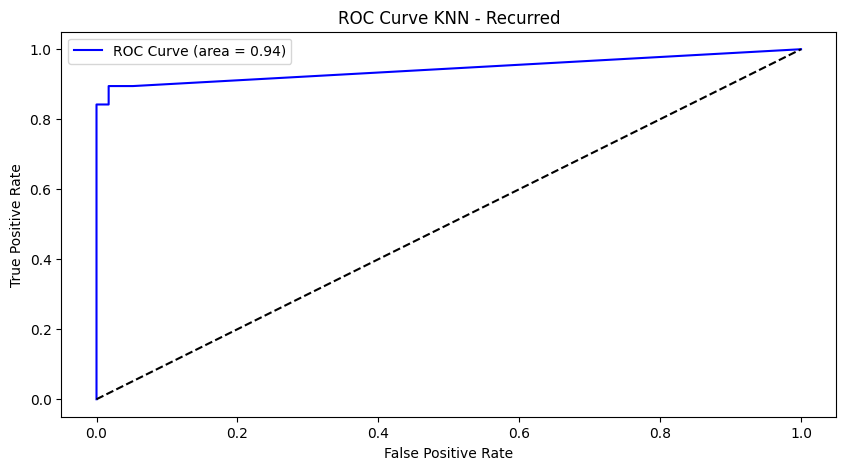

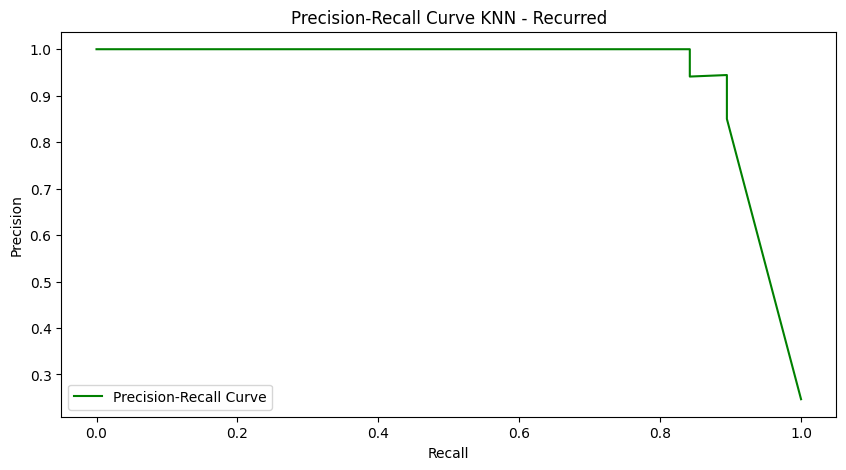


Stage - KNN
Accuracy: 0.9610
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           4       0.75      0.75      0.75         4

    accuracy                           0.96        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.94      0.96      0.95        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


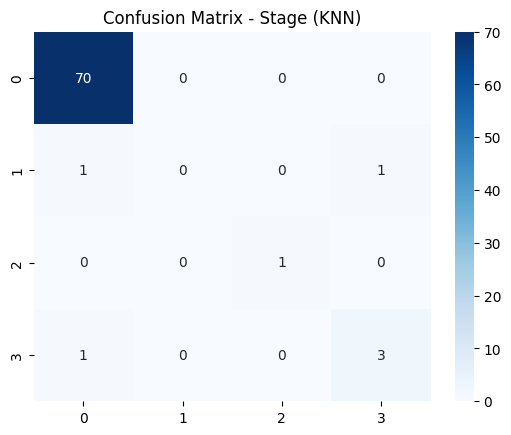

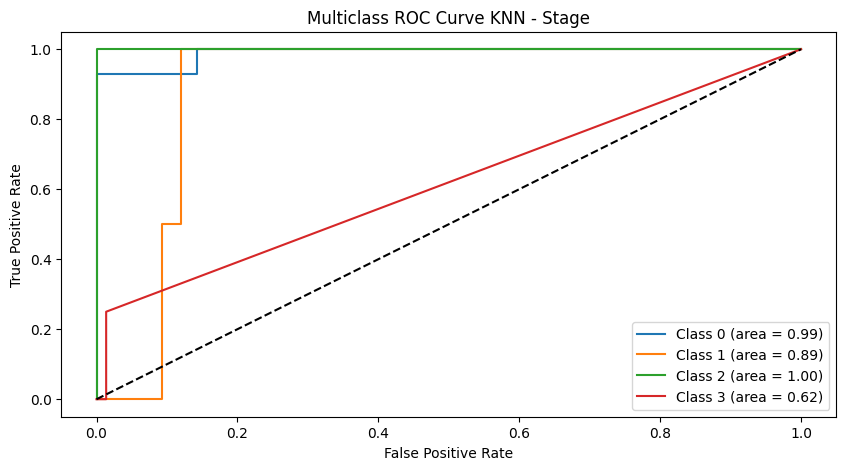

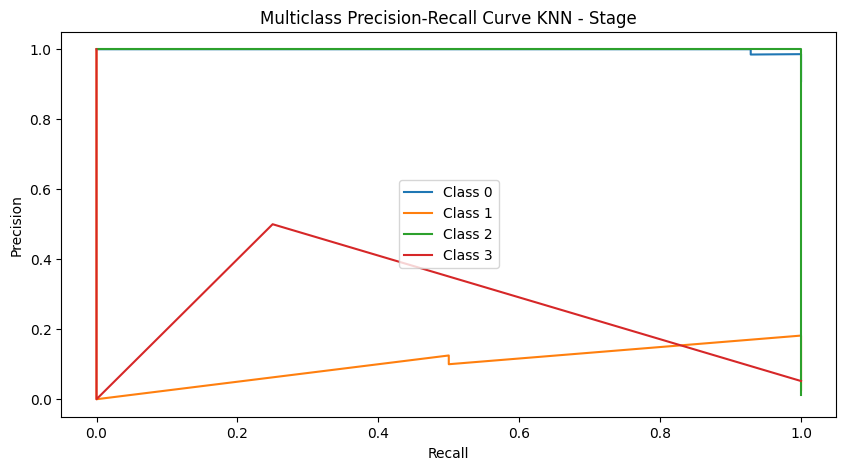


Risk - KNN
Accuracy: 0.8961
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      0.62      0.71        16
           2       0.90      0.98      0.94        55

    accuracy                           0.90        77
   macro avg       0.91      0.81      0.85        77
weighted avg       0.89      0.90      0.89        77



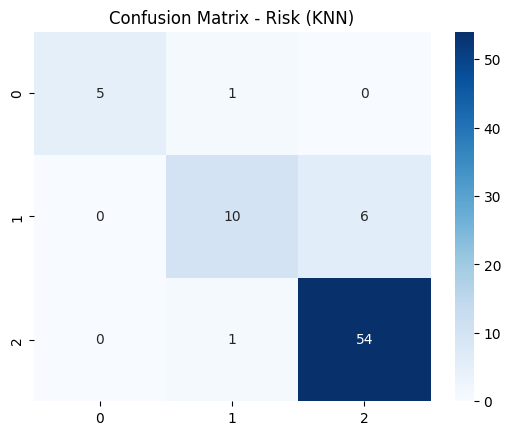

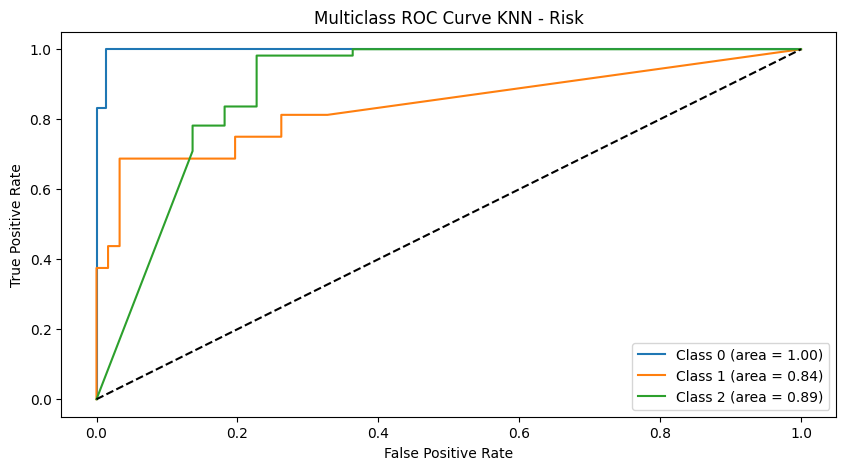

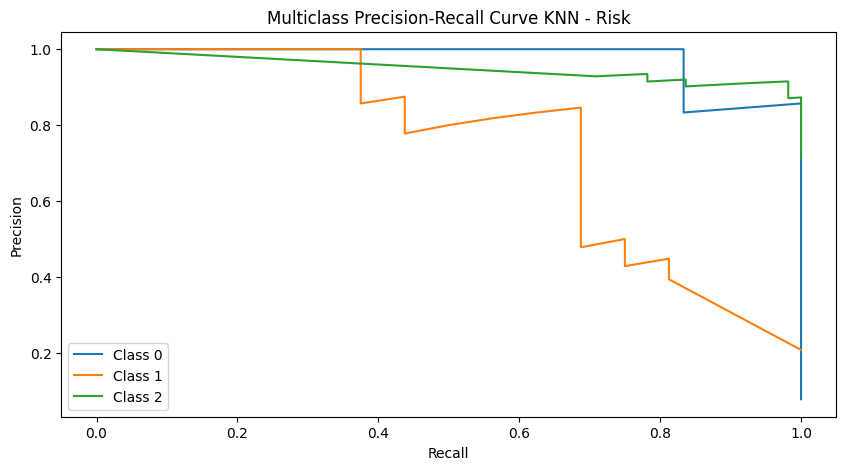

--- Naive Bayes ---

Recurred - Naive Bayes
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.94      0.84      0.89        19

    accuracy                           0.95        77
   macro avg       0.95      0.91      0.93        77
weighted avg       0.95      0.95      0.95        77



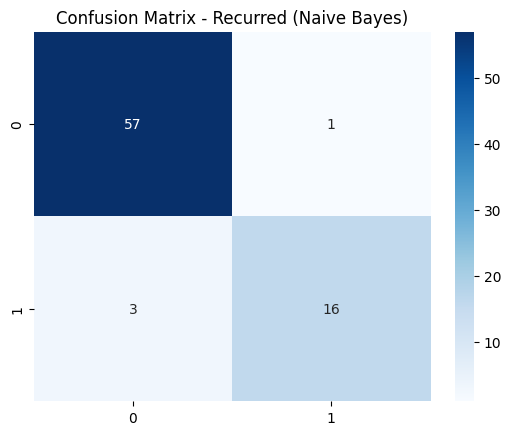

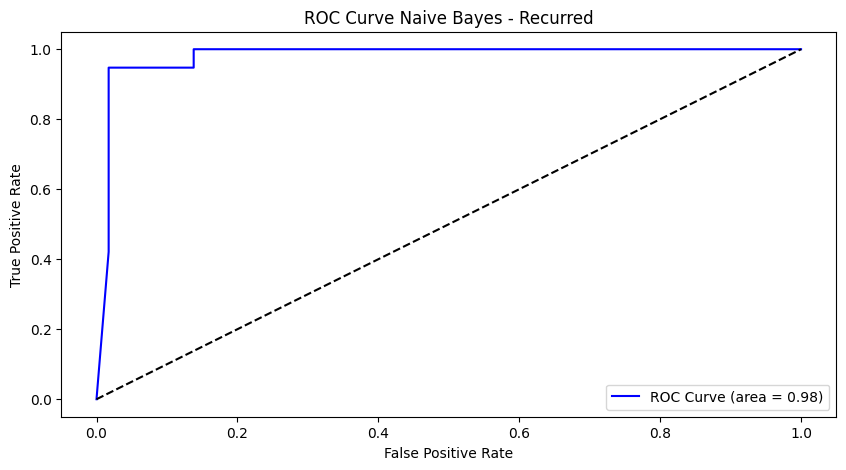

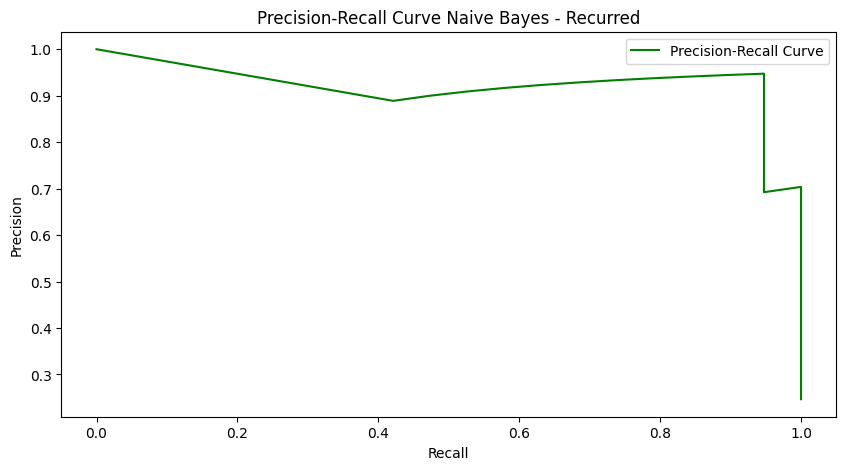


Stage - Naive Bayes
Accuracy: 0.4805
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        70
           1       0.05      1.00      0.10         2
           2       1.00      1.00      1.00         1
           4       0.25      0.25      0.25         4

    accuracy                           0.48        77
   macro avg       0.58      0.68      0.50        77
weighted avg       0.94      0.48      0.61        77



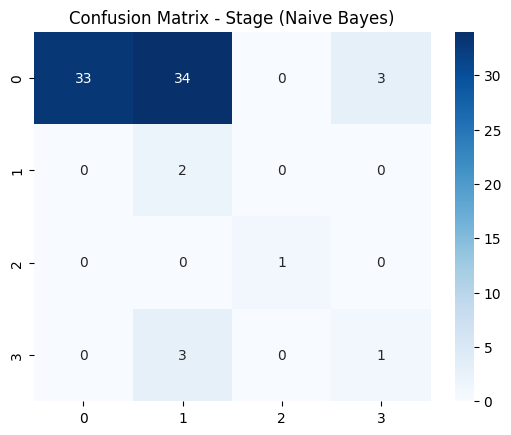

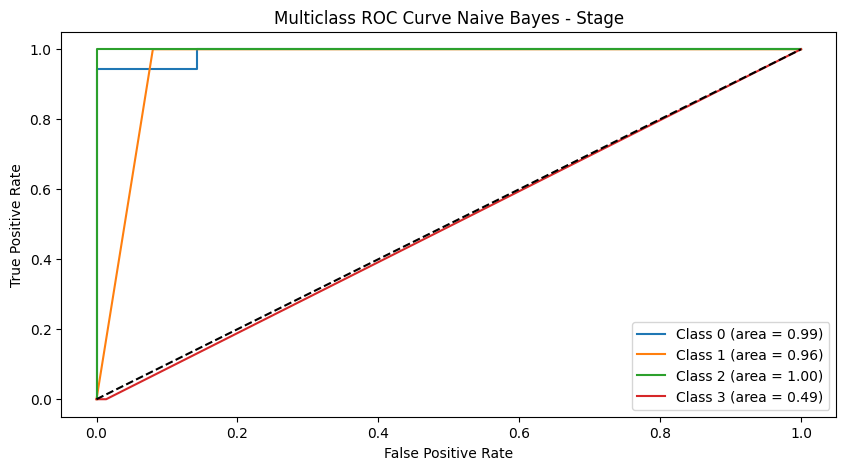

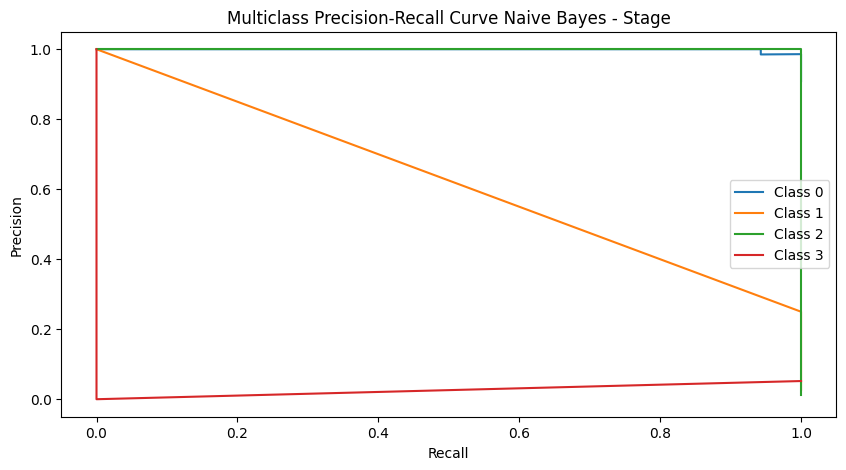


Risk - Naive Bayes
Accuracy: 0.8442
              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       0.80      0.50      0.62        16
           2       0.94      0.93      0.94        55

    accuracy                           0.84        77
   macro avg       0.74      0.81      0.73        77
weighted avg       0.88      0.84      0.85        77



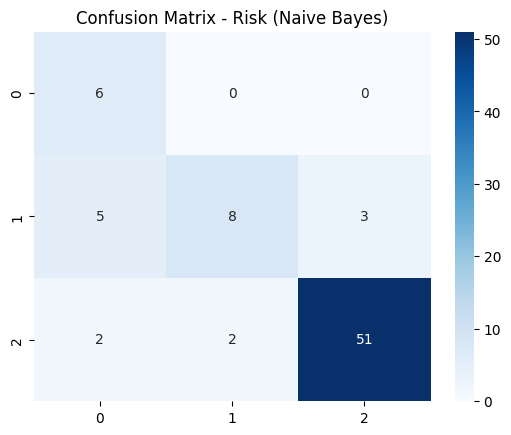

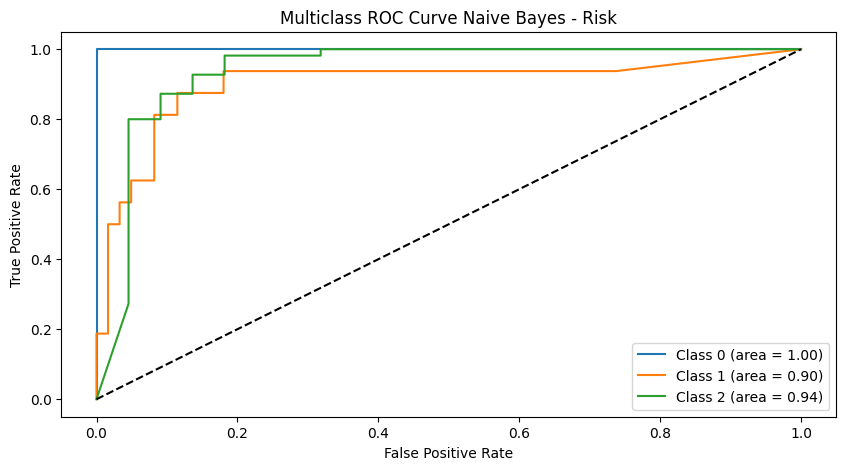

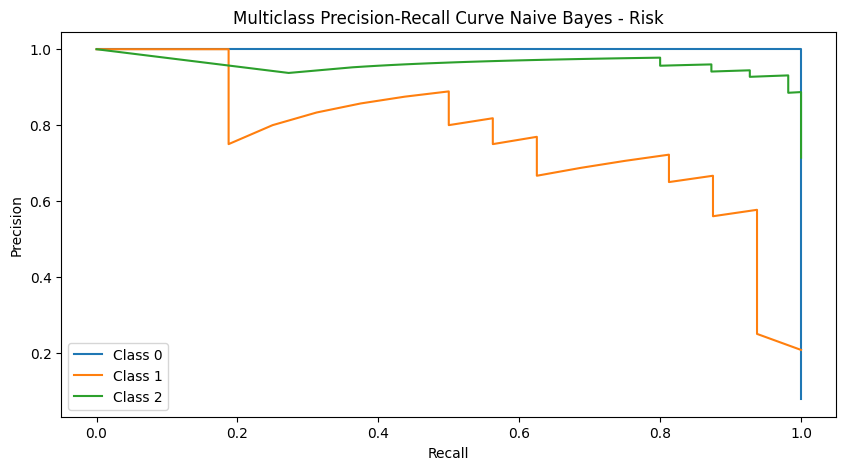

--- XGBoost ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Recurred - XGBoost
Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



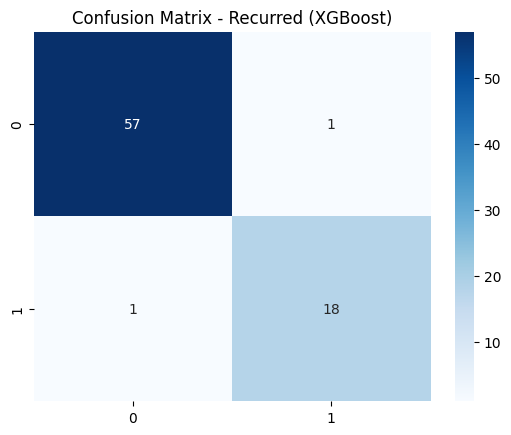

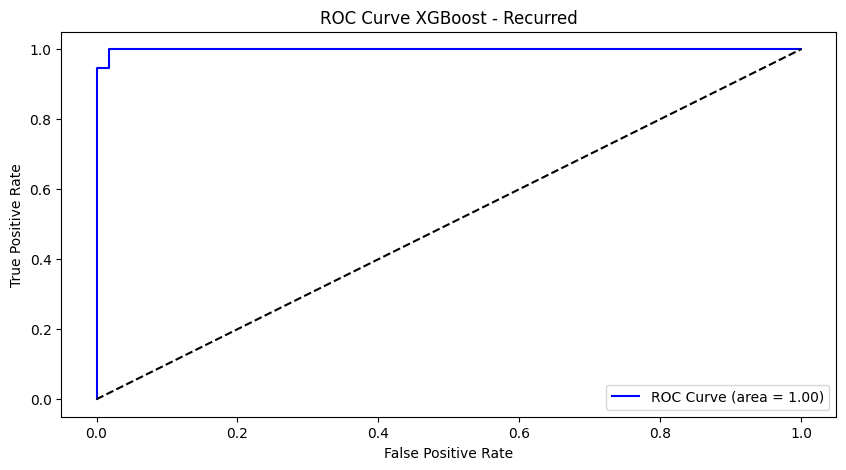

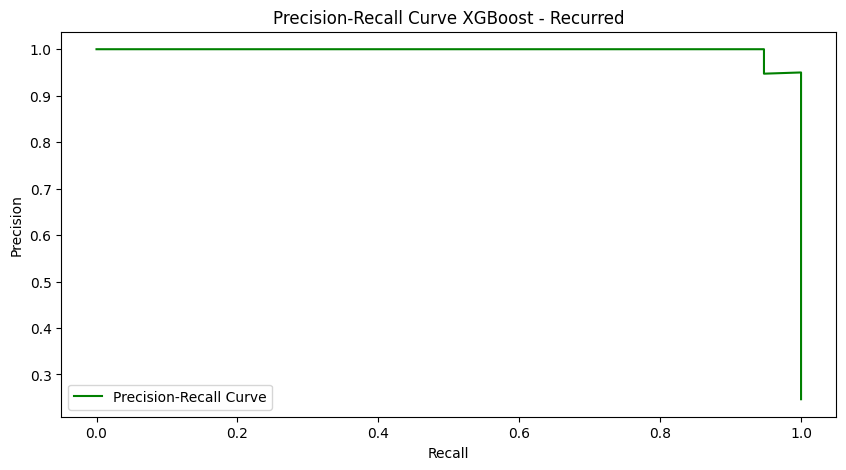


Stage - XGBoost
Accuracy: 0.9870
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           4       1.00      0.75      0.86         4

    accuracy                           0.99        77
   macro avg       0.92      0.94      0.91        77
weighted avg       0.99      0.99      0.99        77



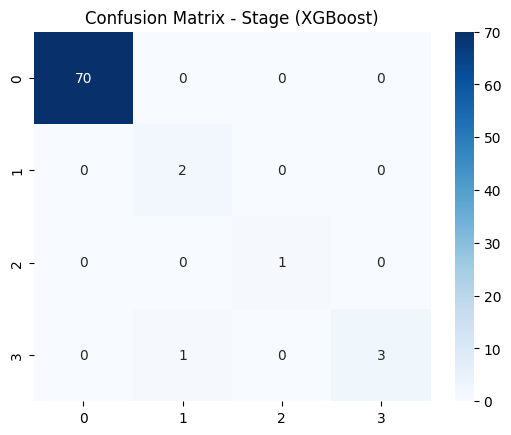

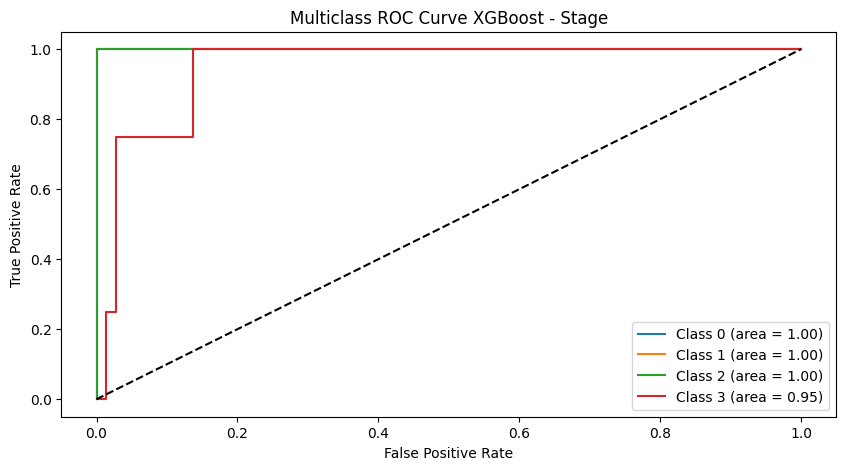

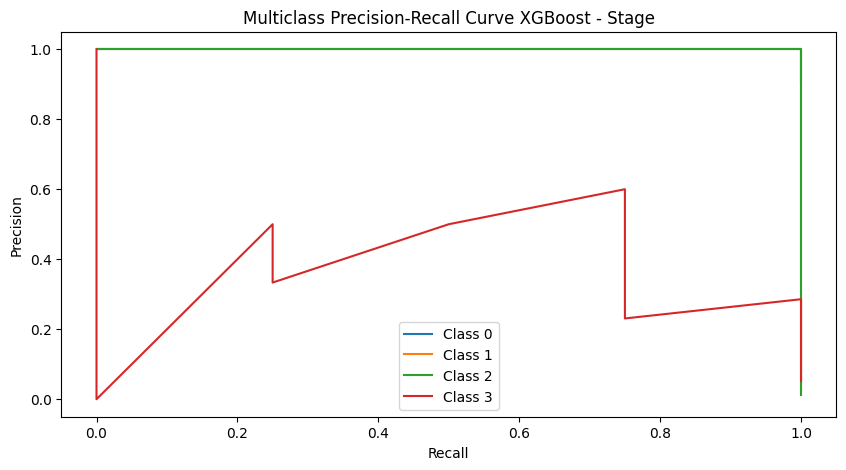


Risk - XGBoost
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.75      0.86        16
           2       0.93      1.00      0.96        55

    accuracy                           0.95        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.95      0.95      0.95        77



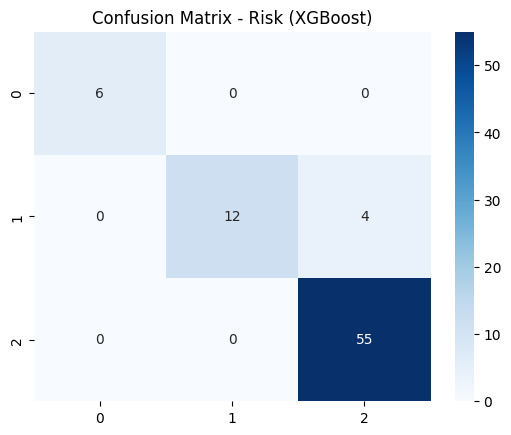

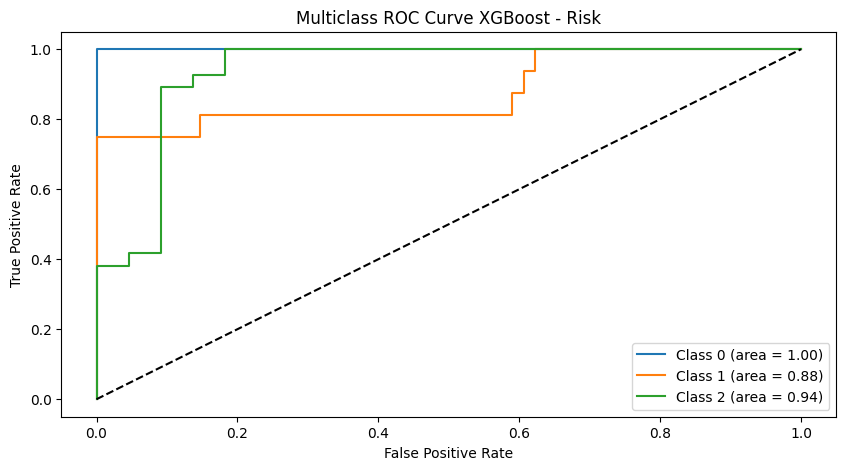

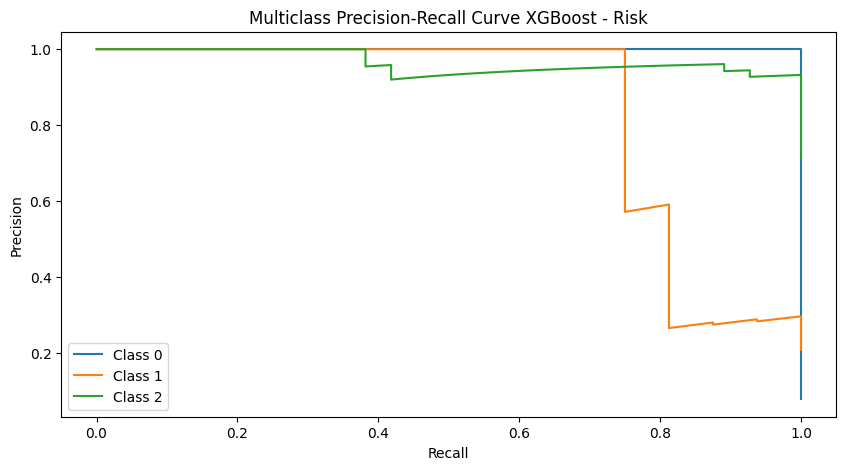

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

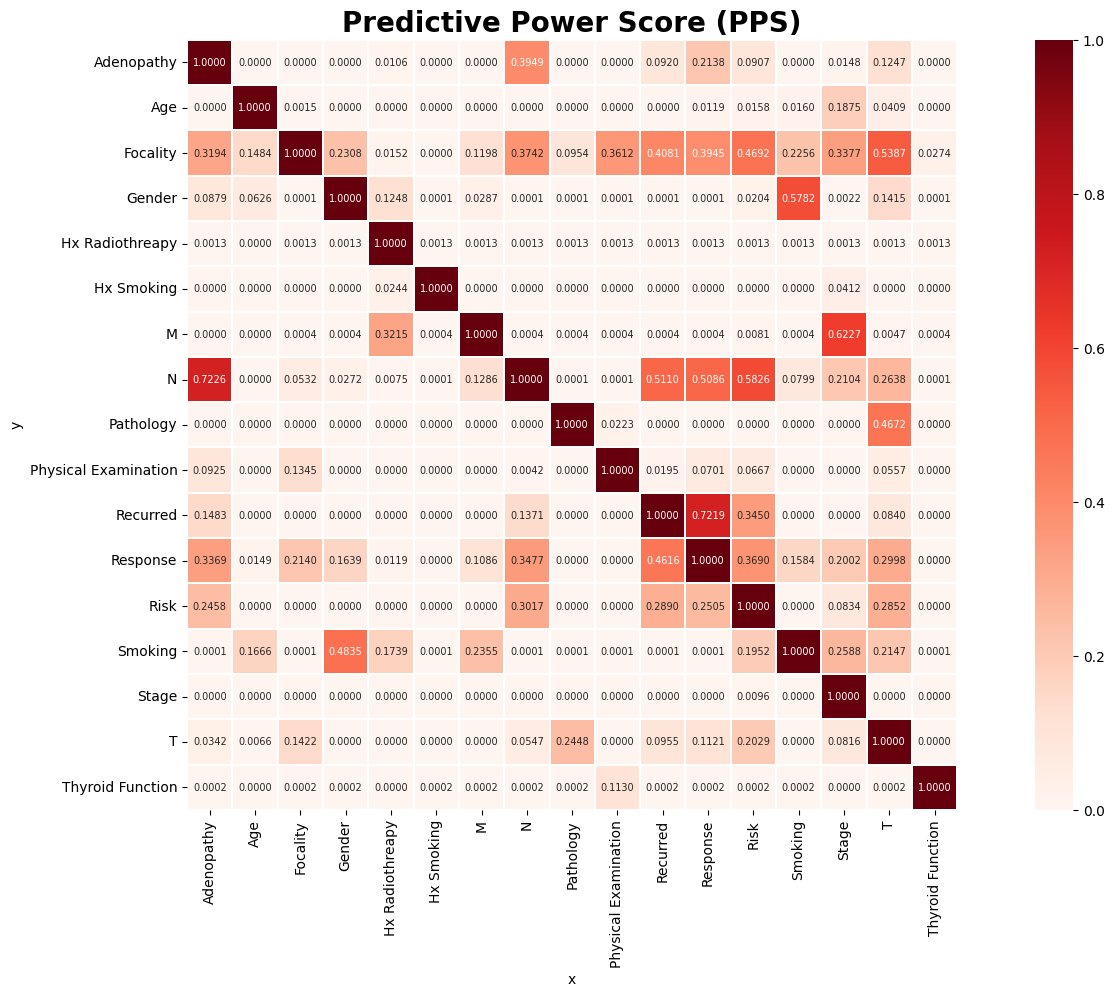

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

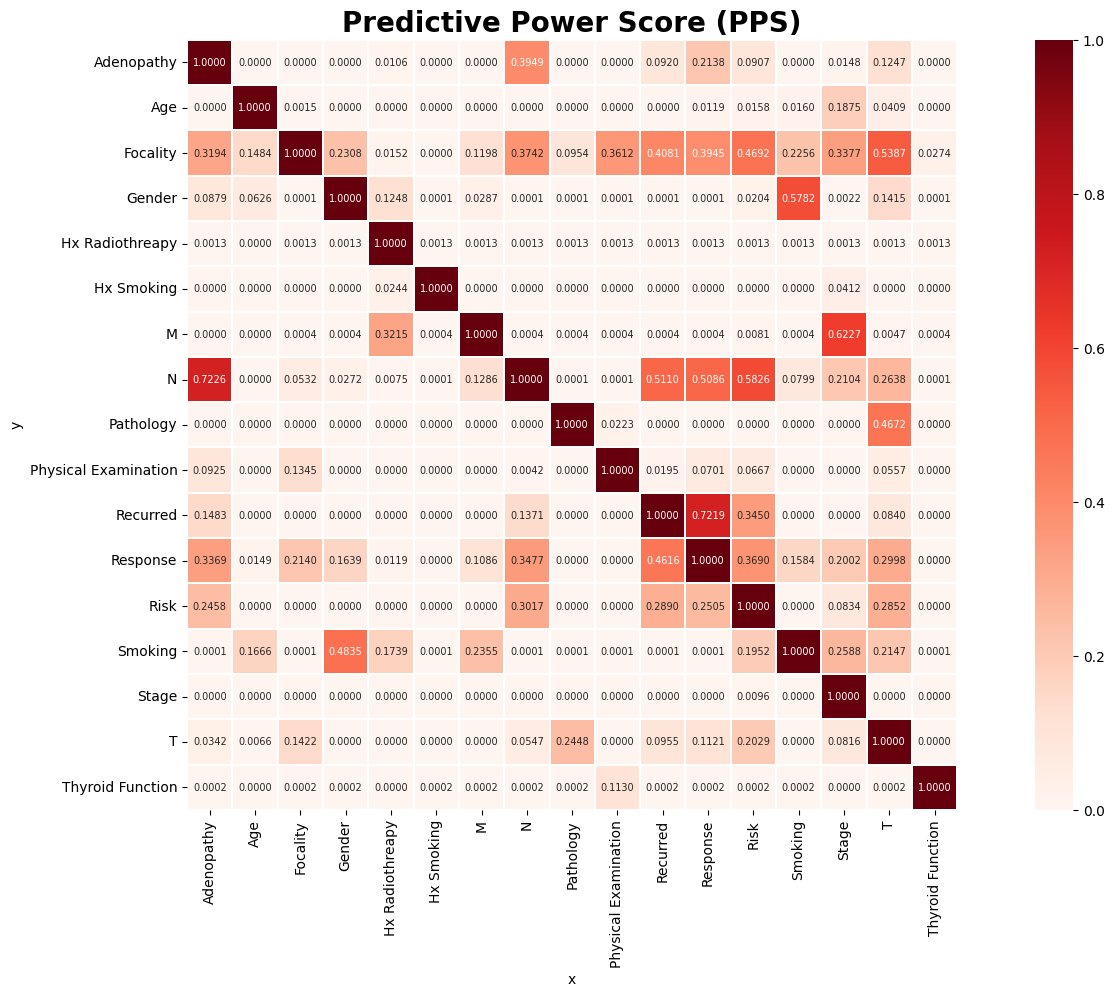

In [ ]:
# Install necessary libraries
!pip install ppscore pandas==1.3.3 xgboost

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, precision_recall_curve,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Thyroid_Diff.csv')

# Label encode the target variables
label_encoder = LabelEncoder()
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])
df['Stage'] = label_encoder.fit_transform(df['Stage'])
df['Risk'] = label_encoder.fit_transform(df['Risk'])

# Separate features and target variables
X = df.drop(['Recurred', 'Stage', 'Risk'], axis=1)
y = df[['Recurred', 'Stage', 'Risk']]

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True).astype(int)

# Split the data for multiple objectives
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models with parameters
models = {
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(n_estimators=100)),
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy')),
    'SVM': MultiOutputClassifier(SVC(C=1, kernel='rbf', probability=True)),
    'Logistic Regression': MultiOutputClassifier(LogisticRegression(C=1, solver='liblinear', max_iter=200)),
    'KNN': MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance')),
    'Naive Bayes': MultiOutputClassifier(GaussianNB()),
    'XGBoost': MultiOutputClassifier(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss'))
}

# Function to plot ROC and Precision-Recall curves
def plot_roc_pr_curves(y_true, y_proba, title_suffix=""):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve {title_suffix}')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
    plt.figure(figsize=(10, 5))
    plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve {title_suffix}')
    plt.legend(loc='best')
    plt.show()

# Train models and evaluate on multiple objectives
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Probabilities for ROC and PR curves

    # Separate predictions and true values for each target
    y_pred_recurred, y_pred_stage, y_pred_risk = y_pred.T
    y_proba_recurred, y_proba_stage, y_proba_risk = y_proba
    y_recurred_test, y_stage_test, y_risk_test = y_test.T.values

    # --- Performance Metrics ---
    print(f"Recurred - {name} Accuracy: {accuracy_score(y_recurred_test, y_pred_recurred):.4f}")
    print(classification_report(y_recurred_test, y_pred_recurred))

    # --- Confusion Matrix ---
    print(f"\nConfusion Matrix for {name} - Recurred")
    sns.heatmap(confusion_matrix(y_recurred_test, y_pred_recurred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name} - Recurred")
    plt.show()

    # --- ROC and Precision-Recall Curves ---
    print(f"\nROC and Precision-Recall Curves for {name}")
    plot_roc_pr_curves(y_recurred_test, y_proba_recurred, title_suffix=f"{name} - Recurred")

    # --- Feature Importance (if applicable) ---
    if hasattr(model.estimator, 'feature_importances_'):
        feature_importances = model.estimator.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f"Feature Importance - {name}")
        plt.show()

# Function to plot ROC and Precision-Recall curves
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Function to plot multiclass ROC and Precision-Recall curves
def plot_multiclass_roc_pr_curves(y_true, y_proba, title_suffix=""):
    # Binarize the true labels for multiclass ROC and PR curves
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    n_classes = y_true_bin.shape[1]

    # ROC Curve
    plt.figure(figsize=(10, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve {title_suffix}')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_proba[:, i])
        plt.plot(recall, precision, label=f"Class {i}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Multiclass Precision-Recall Curve {title_suffix}')
    plt.legend(loc='best')
    plt.show()

# Train models and evaluate on multiple objectives
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Probabilities for ROC and PR curves

    # Separate predictions and true values for each target
    y_pred_recurred, y_pred_stage, y_pred_risk = y_pred.T
    y_proba_recurred, y_proba_stage, y_proba_risk = y_proba
    y_recurred_test, y_stage_test, y_risk_test = y_test.T.values

    # --- Recurred Metrics (Binary Classification) ---
    print(f"\nRecurred - {name}")
    print(f"Accuracy: {accuracy_score(y_recurred_test, y_pred_recurred):.4f}")
    print(classification_report(y_recurred_test, y_pred_recurred))
    sns.heatmap(confusion_matrix(y_recurred_test, y_pred_recurred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - Recurred ({name})")
    plt.show()
    plot_roc_pr_curves(y_recurred_test, y_proba_recurred, title_suffix=f"{name} - Recurred")

    # --- Stage Metrics (Multiclass Classification) ---
    print(f"\nStage - {name}")
    print(f"Accuracy: {accuracy_score(y_stage_test, y_pred_stage):.4f}")
    print(classification_report(y_stage_test, y_pred_stage))
    sns.heatmap(confusion_matrix(y_stage_test, y_pred_stage), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - Stage ({name})")
    plt.show()
    plot_multiclass_roc_pr_curves(y_stage_test, np.array(y_proba_stage), title_suffix=f"{name} - Stage")

    # --- Risk Metrics (Multiclass Classification) ---
    print(f"\nRisk - {name}")
    print(f"Accuracy: {accuracy_score(y_risk_test, y_pred_risk):.4f}")
    print(classification_report(y_risk_test, y_pred_risk))
    sns.heatmap(confusion_matrix(y_risk_test, y_pred_risk), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - Risk ({name})")
    plt.show()
    plot_multiclass_roc_pr_curves(y_risk_test, np.array(y_proba_risk), title_suffix=f"{name} - Risk")

    # --- Feature Importance (if applicable) ---
    if hasattr(model.estimator, 'feature_importances_'):
        feature_importances = model.estimator.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f"Feature Importance - {name}")
        plt.show()


# Generate and visualize PPS matrix
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot_table(values='ppscore', index='y', columns='x')
plt.figure(figsize=(20, 10))
sns.heatmap(pps_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 7}, fmt='.4f', square=True, linewidths=1.1)
plt.title("Predictive Power Score (PPS)", fontsize=20, fontweight='bold', color='black')
plt.show()

# Generate and visualize PPS matrix
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot_table(values='ppscore', index='y', columns='x')
plt.figure(figsize=(20, 10))
sns.heatmap(pps_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 7}, fmt='.4f', square=True, linewidths=1.1)
plt.title("Predictive Power Score (PPS)", fontsize=20, fontweight='bold', color='black')
plt.show()


In [ ]:
!pip install transformers tensorflow


In [ ]:
!pip install pytorch-tabnet


**Using Tabular-Specific Transfer Learning Models (TabNet or TabTransformer)**
Models like TabNet and TabTransformer are designed for tabular data and support multiple outputs, making them more suitable than BERT or ResNet for this type of data.seperate labels for rach target variables

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
import torch

# Make a copy of the target DataFrame to avoid SettingWithCopyWarning
y_encoded = y.copy()

# Label encode the targets
label_encoder = LabelEncoder()
y_encoded['Risk'] = label_encoder.fit_transform(y_encoded['Risk'])
y_encoded['Recurred'] = label_encoder.fit_transform(y_encoded['Recurred'])
y_encoded['Stage'] = label_encoder.fit_transform(y_encoded['Stage'])

# Convert data to tensors (assuming X_train and X_test are numpy arrays)
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

# Separate each target into individual arrays
y_risk = torch.LongTensor(y_train['Risk'].values)
y_recurred = torch.LongTensor(y_train['Recurred'].values)
y_stage = torch.LongTensor(y_train['Stage'].values)

# Initialize TabNet model for multi-task learning
tabnet = TabNetClassifier()

# Train each task separately and combine results later
tabnet.fit(
    X_train_tensor.numpy(), y_risk.numpy(),
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Predict for each task
y_pred_risk = tabnet.predict(X_test_tensor.numpy())

# Repeat fit and predict for 'Recurred' and 'Stage'
tabnet.fit(
    X_train_tensor.numpy(), y_recurred.numpy(),
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)
y_pred_recurred = tabnet.predict(X_test_tensor.numpy())

tabnet.fit(
    X_train_tensor.numpy(), y_stage.numpy(),
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)
y_pred_stage = tabnet.predict(X_test_tensor.numpy())

# Evaluate model for each target
from sklearn.metrics import accuracy_score

print(f"Accuracy for Risk: {accuracy_score(y_test['Risk'], y_pred_risk):.4f}")
print(f"Accuracy for Recurred: {accuracy_score(y_test['Recurred'], y_pred_recurred):.4f}")
print(f"Accuracy for Stage: {accuracy_score(y_test['Stage'], y_pred_stage):.4f}")


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.06991 |  0:00:03s
epoch 1  | loss: 1.00657 |  0:00:03s
epoch 2  | loss: 0.97588 |  0:00:03s
epoch 3  | loss: 0.86202 |  0:00:03s
epoch 4  | loss: 0.85897 |  0:00:03s
epoch 5  | loss: 0.74739 |  0:00:04s
epoch 6  | loss: 0.74947 |  0:00:04s
epoch 7  | loss: 0.70731 |  0:00:04s
epoch 8  | loss: 0.72196 |  0:00:04s
epoch 9  | loss: 0.64278 |  0:00:04s
epoch 10 | loss: 0.58123 |  0:00:04s
epoch 11 | loss: 0.587   |  0:00:04s
epoch 12 | loss: 0.56522 |  0:00:04s
epoch 13 | loss: 0.54405 |  0:00:04s
epoch 14 | loss: 0.59921 |  0:00:05s
epoch 15 | loss: 0.52256 |  0:00:05s
epoch 16 | loss: 0.48124 |  0:00:05s
epoch 17 | loss: 0.5056  |  0:00:05s
epoch 18 | loss: 0.45825 |  0:00:05s
epoch 19 | loss: 0.4386  |  0:00:05s
epoch 20 | loss: 0.43552 |  0:00:05s
epoch 21 | loss: 0.46764 |  0:00:05s
epoch 22 | loss: 0.37316 |  0:00:05s
epoch 23 | loss: 0.3901  |  0:00:06s
epoch 24 | loss: 0.38672 |  0:00:06s
epoch 25 | loss: 0.3439  |  0:00:06s
epoch 26 | loss: 0.386   |  0:00:06s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.08516 |  0:00:00s
epoch 1  | loss: 0.99603 |  0:00:00s
epoch 2  | loss: 0.75207 |  0:00:00s
epoch 3  | loss: 0.62387 |  0:00:00s
epoch 4  | loss: 0.5896  |  0:00:00s
epoch 5  | loss: 0.49657 |  0:00:00s
epoch 6  | loss: 0.4122  |  0:00:00s
epoch 7  | loss: 0.3927  |  0:00:00s
epoch 8  | loss: 0.33913 |  0:00:00s
epoch 9  | loss: 0.31765 |  0:00:00s
epoch 10 | loss: 0.28463 |  0:00:00s
epoch 11 | loss: 0.24555 |  0:00:00s
epoch 12 | loss: 0.28181 |  0:00:00s
epoch 13 | loss: 0.26395 |  0:00:00s
epoch 14 | loss: 0.2614  |  0:00:01s
epoch 15 | loss: 0.23655 |  0:00:01s
epoch 16 | loss: 0.164   |  0:00:01s
epoch 17 | loss: 0.18409 |  0:00:01s
epoch 18 | loss: 0.17563 |  0:00:01s
epoch 19 | loss: 0.16457 |  0:00:01s
epoch 20 | loss: 0.1681  |  0:00:01s
epoch 21 | loss: 0.18084 |  0:00:01s
epoch 22 | loss: 0.1739  |  0:00:01s
epoch 23 | loss: 0.14233 |  0:00:01s
epoch 24 | loss: 0.16724 |  0:00:01s
epoch 25 | loss: 0.17501 |  0:00:01s
epoch 26 | loss: 0.14302 |  0:00:01s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.14264 |  0:00:00s
epoch 1  | loss: 1.94955 |  0:00:00s
epoch 2  | loss: 1.72801 |  0:00:00s
epoch 3  | loss: 1.49174 |  0:00:00s
epoch 4  | loss: 1.41345 |  0:00:00s
epoch 5  | loss: 1.1843  |  0:00:00s
epoch 6  | loss: 1.08921 |  0:00:00s
epoch 7  | loss: 0.99781 |  0:00:00s
epoch 8  | loss: 0.88421 |  0:00:00s
epoch 9  | loss: 0.74765 |  0:00:01s
epoch 10 | loss: 0.67197 |  0:00:01s
epoch 11 | loss: 0.62501 |  0:00:01s
epoch 12 | loss: 0.62061 |  0:00:01s
epoch 13 | loss: 0.55188 |  0:00:01s
epoch 14 | loss: 0.49787 |  0:00:01s
epoch 15 | loss: 0.54115 |  0:00:01s
epoch 16 | loss: 0.43651 |  0:00:01s
epoch 17 | loss: 0.43539 |  0:00:01s
epoch 18 | loss: 0.44389 |  0:00:01s
epoch 19 | loss: 0.40529 |  0:00:01s
epoch 20 | loss: 0.42716 |  0:00:02s
epoch 21 | loss: 0.38804 |  0:00:02s
epoch 22 | loss: 0.37062 |  0:00:02s
epoch 23 | loss: 0.42348 |  0:00:02s
epoch 24 | loss: 0.28749 |  0:00:02s
epoch 25 | loss: 0.39403 |  0:00:02s
epoch 26 | loss: 0.36333 |  0:00:02s
e

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
X = train_data.drop(columns = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'])
y1 = train_data["Risk"]
y2 = train_data["Stage"]
y3 = train_data["Recurred"]

In [ ]:
print(X)

     Age Gender  Smoking  Hx Smoking  Hx Radiothreapy
165   40      F        0           0                0
321   62      F        0           0                0
220   29      F        0           0                0
94    37      F        0           0                0
232   31      F        0           0                0
..   ...    ...      ...         ...              ...
71    69      F        0           0                0
106   26      F        0           0                0
270   39      F        0           0                0
348   58      F        0           0                0
102   27      F        0           0                0

[306 rows x 5 columns]


In [ ]:
def row_to_text(row):
    return f"Patient of age {row['Age']}, gender {row['Gender']}, smoking history: {row['Smoking']}, " \
           f"radiotherapy: {row.get('Hx Radiotherapy', 'N/A')}}."

df['text'] = df.apply(row_to_text, axis=1)

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
